# Mission 1--- Nettoyage des données

In [1]:
# on va importe tout les bibliotheques qu'on aura besoin d'utiliser 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import datetime as dt
import re
from sklearn.linear_model import SGDClassifier
%matplotlib inline
from datetime import timedelta
import scipy.stats as st
import pylab

In [2]:
#Paramètres graphiques
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams['font.size'] = 16

In [3]:
# affiche le table de client 
Clients = pd.read_csv('customers.csv')
Clients

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [4]:
#nombre de clients 
Clients["client_id"].count()

8623

In [5]:
#proportion de sex
sex=Clients['sex'].value_counts()
prop =round(sex/sex.sum(),2)
prop

f    0.52
m    0.48
Name: sex, dtype: float64

In [6]:
Clients.describe()

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


In [7]:
#informations
Clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [8]:
#création de colonne année d'aujourd'hui
n=len(Clients)
Clients['now_year']=[2022] * n
Clients

,client_id,sex,birth,now_year
0,c_4410,f,1967,2022
1,c_7839,f,1975,2022
2,c_1699,f,1984,2022
3,c_5961,f,1962,2022
4,c_5320,m,1943,2022
...,...,...,...,...
8618,c_7920,m,1956,2022
8619,c_7403,f,1970,2022
8620,c_5119,m,1974,2022
8621,c_5643,f,1968,2022


In [9]:
#création de colonne Age
Clients['Age']= Clients['now_year']-Clients['birth']
Clients

,client_id,sex,birth,now_year,Age
0,c_4410,f,1967,2022,55
1,c_7839,f,1975,2022,47
2,c_1699,f,1984,2022,38
3,c_5961,f,1962,2022,60
4,c_5320,m,1943,2022,79
...,...,...,...,...,...
8618,c_7920,m,1956,2022,66
8619,c_7403,f,1970,2022,52
8620,c_5119,m,1974,2022,48
8621,c_5643,f,1968,2022,54


In [10]:
# mean, standard deviation, q1,medium,q3,min and max
Clients['Age'].describe()

count    8623.000000
mean       43.719123
std        16.919535
min        18.000000
25%        30.000000
50%        43.000000
75%        56.000000
max        93.000000
Name: Age, dtype: float64

In [11]:
#tendance centrale
Clients.describe()

,birth,now_year,Age
count,8623.000000,8623.0,8623.000000
mean,1978.280877,2022.0,43.719123
std,16.919535,0.0,16.919535
min,1929.000000,2022.0,18.000000
25%,1966.000000,2022.0,30.000000
50%,1979.000000,2022.0,43.000000
75%,1992.000000,2022.0,56.000000
max,2004.000000,2022.0,93.000000


In [12]:
#informaion 
Clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
 3   now_year   8623 non-null   int64 
 4   Age        8623 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 337.0+ KB


In [13]:
#afficher le table de produits
Produits=pd.read_csv('products.csv')
Produits

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [14]:
#informations
Produits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [15]:
# summary statistics
Produits.describe()
#problème car min est negative on va ici faire l'impitation par la moyenne 

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [16]:
#tendance centrale
Produits.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [17]:
# ratio des categories produits
categ=Produits['categ'].value_counts()
prop_cat =round(categ/categ.sum(),2)
prop_cat

0    0.70
1    0.22
2    0.07
Name: categ, dtype: float64

In [18]:
#afficher le table de Ventes 
Ventes=pd.read_csv('transactions.csv')
Ventes

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242
...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5


In [19]:
#informations
Ventes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     337016 non-null  object
 1   date        337016 non-null  object
 2   session_id  337016 non-null  object
 3   client_id   337016 non-null  object
dtypes: object(4)
memory usage: 10.3+ MB


In [20]:
#chercher les valeurs manquantes 
Ventes.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [21]:
#summary 
Ventes.describe()

,id_prod,date,session_id,client_id
count,337016,337016,337016,337016
unique,3266,336855,169195,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,1081,13,200,12855


In [22]:
Ventes.sort_values(by="date")

,id_prod,date,session_id,client_id
176588,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
95285,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
216737,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
180767,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
293481,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
...,...,...,...,...
317345,T_0,test_2021-03-01 02:30:02.237448,s_0,ct_0
203418,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
203239,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
245346,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1


In [23]:
#jointure à gauche avec clé id_client
ventes_Clients=pd.merge(Ventes,Clients,on='client_id',how='left') 
ventes_Clients

,id_prod,date,session_id,client_id,sex,birth,now_year,Age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,2022,45
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,2022,22
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,2022,43
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,2022,59
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,2022,42
...,...,...,...,...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,2022,53
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,2022,31
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,2022,54
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994,2022,28


In [24]:
#jointure à gauche avec clé id_prod
Ventes_produits=pd.merge(ventes_Clients,Produits,on="id_prod",how='left')
Ventes_produits

,id_prod,date,session_id,client_id,sex,birth,now_year,Age,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,2022,45,4.99,0.0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,2022,22,65.75,2.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,2022,43,10.71,1.0
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,2022,59,4.20,0.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,2022,42,8.99,0.0
...,...,...,...,...,...,...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,2022,53,31.99,1.0
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,2022,31,22.99,0.0
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,2022,54,11.03,0.0
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994,2022,28,50.99,2.0


In [25]:
#description tendance centrale
Ventes_produits.describe()

,birth,now_year,Age,price,categ
count,337016.000000,337016.0,337016.000000,336913.000000,336913.000000
mean,1977.837150,2022.0,44.162850,17.204376,0.429900
std,13.531686,0.0,13.531686,17.855658,0.590999
min,1929.000000,2022.0,18.000000,-1.000000,0.000000
25%,1971.000000,2022.0,35.000000,8.580000,0.000000
50%,1980.000000,2022.0,42.000000,13.900000,0.000000
75%,1987.000000,2022.0,51.000000,18.990000,1.000000
max,2004.000000,2022.0,93.000000,300.000000,2.000000


In [26]:
#filtrage de lignes où le prix est -1 
prix_impo = Ventes_produits.loc[Ventes_produits['price']== -1 ,:]
prix_impo

,id_prod,date,session_id,client_id,sex,birth,now_year,Age,price,categ
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1,m,2001,2022,21,-1.0,0.0
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1,m,2001,2022,21,-1.0,0.0
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1,m,2001,2022,21,-1.0,0.0
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0,f,2001,2022,21,-1.0,0.0
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1,m,2001,2022,21,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
332594,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_0,f,2001,2022,21,-1.0,0.0
332705,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1,m,2001,2022,21,-1.0,0.0
332730,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1,m,2001,2022,21,-1.0,0.0
333442,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1,m,2001,2022,21,-1.0,0.0


In [27]:
#on a remarque que le prix -1 est le test alors il faut tout supprimer tous les lignes de test 
# Obtenir les noms des index pour lesquels la colonne Stock a la valeur -1
indexNames =Ventes_produits.loc[Ventes_produits['price']== -1 ,:].index
# Supprimer ces index de ligne de dataFrame
Ventes_produits.drop(indexNames , inplace=True)
Ventes_produits

,id_prod,date,session_id,client_id,sex,birth,now_year,Age,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,2022,45,4.99,0.0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,2022,22,65.75,2.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,2022,43,10.71,1.0
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,2022,59,4.20,0.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,2022,42,8.99,0.0
...,...,...,...,...,...,...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,2022,53,31.99,1.0
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,2022,31,22.99,0.0
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,2022,54,11.03,0.0
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994,2022,28,50.99,2.0


In [28]:
Ventes_produits.sort_values(by="date")

,id_prod,date,session_id,client_id,sex,birth,now_year,Age,price,categ
176588,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,2022,55,11.99,0.0
95285,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,2022,62,19.37,0.0
216737,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,2022,34,4.50,0.0
180767,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,2022,33,6.55,0.0
293481,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,2022,66,16.49,0.0
...,...,...,...,...,...,...,...,...,...,...
208601,1_456,2022-02-28 23:56:57.196281,s_172422,c_5787,f,1986,2022,36,28.27,1.0
242599,1_370,2022-02-28 23:56:57.561424,s_172423,c_1460,m,1989,2022,33,13.11,1.0
6245,0_1538,2022-02-28 23:57:12.741573,s_172424,c_1876,m,1983,2022,39,8.61,0.0
301528,0_1403,2022-02-28 23:59:02.381670,s_172423,c_1460,m,1989,2022,33,15.99,0.0


In [29]:
#tendance cetrale
Ventes_produits.describe()

,birth,now_year,Age,price,categ
count,336816.000000,336816.0,336816.000000,336713.000000,336713.000000
mean,1977.823396,2022.0,44.176604,17.215189,0.430156
std,13.523923,0.0,13.523923,17.855445,0.591082
min,1929.000000,2022.0,18.000000,0.620000,0.000000
25%,1971.000000,2022.0,35.000000,8.610000,0.000000
50%,1980.000000,2022.0,42.000000,13.900000,0.000000
75%,1987.000000,2022.0,51.000000,18.990000,1.000000
max,2004.000000,2022.0,93.000000,300.000000,2.000000


In [30]:
#énumération des colonnes
print(Ventes_produits.columns)

Index(['id_prod', 'date', 'session_id', 'client_id', 'sex', 'birth',
       'now_year', 'Age', 'price', 'categ'],
      dtype='object')


In [31]:
#type de chaque colonne
print(Ventes_produits.dtypes)

id_prod        object
date           object
session_id     object
client_id      object
sex            object
birth           int64
now_year        int64
Age             int64
price         float64
categ         float64
dtype: object


In [32]:
#informations de dataframe
Ventes_produits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336816 entries, 0 to 337015
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     336816 non-null  object 
 1   date        336816 non-null  object 
 2   session_id  336816 non-null  object 
 3   client_id   336816 non-null  object 
 4   sex         336816 non-null  object 
 5   birth       336816 non-null  int64  
 6   now_year    336816 non-null  int64  
 7   Age         336816 non-null  int64  
 8   price       336713 non-null  float64
 9   categ       336713 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 28.3+ MB


In [33]:
#chercher les valeurs manquantes par colonne
Ventes_produits.isnull().sum()

id_prod         0
date            0
session_id      0
client_id       0
sex             0
birth           0
now_year        0
Age             0
price         103
categ         103
dtype: int64

In [34]:
#trie en odre par le prix 
Ventes_produits.sort_values(by="price")

,id_prod,date,session_id,client_id,sex,birth,now_year,Age,price,categ
71979,0_528,2021-05-29 20:46:36.259964,s_41352,c_3757,f,1959,2022,63,0.62,0.0
251022,0_202,2021-03-05 17:06:24.511487,s_2176,c_5277,m,1976,2022,46,0.62,0.0
84380,0_528,2021-10-14 11:22:30.187048,s_104606,c_4951,m,1984,2022,38,0.62,0.0
25621,0_202,2021-05-14 15:26:20.597059,s_34456,c_5510,f,1941,2022,81,0.62,0.0
220588,0_202,2021-04-08 17:47:18.158963,s_17806,c_3297,f,1975,2022,47,0.62,0.0
...,...,...,...,...,...,...,...,...,...,...
322710,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,f,1979,2022,43,NaN,NaN
329417,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,f,1983,2022,39,NaN,NaN
330490,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,f,1984,2022,38,NaN,NaN
335531,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595,f,1973,2022,49,NaN,NaN


In [35]:
#filtrage de lignes où l'identite de produit sans prix  
produit_id = Ventes_produits.loc[Ventes_produits['id_prod']=='0_2245',:]
produit_id

,id_prod,date,session_id,client_id,sex,birth,now_year,Age,price,categ
6235,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,m,1972,2022,50,NaN,NaN
10802,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,m,1973,2022,49,NaN,NaN
14051,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,f,1975,2022,47,NaN,NaN
17486,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,f,1982,2022,40,NaN,NaN
21078,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,m,1988,2022,34,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
322710,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,f,1979,2022,43,NaN,NaN
329417,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,f,1983,2022,39,NaN,NaN
330490,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,f,1984,2022,38,NaN,NaN
335531,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595,f,1973,2022,49,NaN,NaN


In [36]:
#identifier tout les ventes dont le categ est Zéro 
categzero = Ventes_produits.loc[Ventes_produits['categ']==0,:]
categzero

,id_prod,date,session_id,client_id,sex,birth,now_year,Age,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,2022,45,4.99,0.0
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,2022,59,4.20,0.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,2022,42,8.99,0.0
5,0_1085,2021-09-15 05:47:48.215162,s_90139,c_2526,f,1982,2022,40,3.99,0.0
6,0_1508,2021-08-29 05:39:01.055455,s_82100,c_5799,f,1962,2022,60,8.03,0.0
...,...,...,...,...,...,...,...,...,...,...
337006,0_153,2021-10-17 12:47:22.803642,s_106129,c_682,f,1974,2022,48,3.99,0.0
337009,0_1475,2021-07-22 13:47:39.400914,s_65686,c_5607,m,1950,2022,72,11.99,0.0
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,2022,31,22.99,0.0
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,2022,54,11.03,0.0


In [37]:
# calcule de la moyenne de categ 0
prix_moyen_cat0=categzero['price'].mean()
round(prix_moyen_cat0,2)

10.65

In [38]:
#Imputation par la moyenne de categ 0
# imputation par la moyenne 
Ventes_produits['price']=Ventes_produits['price'].fillna(round(prix_moyen_cat0,2)) 

In [39]:
#imputation par la valeur la plus frequentes qui est le categ 0 à 70%
Ventes_produits['categ']=Ventes_produits['categ'].fillna(0)

In [40]:
#change le type de  date 
Ventes_produits['date'] = pd.to_datetime(Ventes_produits.date, format='%Y-%m-%d %H:%M:%S', errors = 'coerce')

In [41]:
#chercher les valeurs manquantes par colonne
Ventes_produits.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
sex           0
birth         0
now_year      0
Age           0
price         0
categ         0
dtype: int64

In [42]:
#chiffre d'affaire mansuelles
Ventes_mois =Ventes_produits.groupby(pd.Grouper(key='date', freq='M')).sum()
Ventes_mois

,birth,now_year,Age,price,categ
date,,,,,
2021-03-31,56502988,57764496,1261508,479407.88,11764.0
2021-04-30,56208404,57455130,1246726,473129.82,10581.0
2021-05-31,55867629,57111390,1243761,489453.15,11413.0
2021-06-30,53048034,54228018,1179984,481332.49,12602.0
2021-07-31,48894264,49975752,1081488,480941.26,13125.0
2021-08-31,50682958,51801618,1118660,479401.04,11850.0
2021-09-30,65777978,67263852,1485874,502899.08,11016.0
2021-10-31,42711852,43642848,930996,319234.51,3986.0
2021-11-30,55915655,57176094,1260439,512996.67,15062.0


# détection d'une anomalie au niveau de colonne categ pour le mois octobre 

In [43]:
#calcule des tendance centrale
Ventes_mois.describe()

,birth,now_year,Age,price,categ
count,1.200000e+01,1.200000e+01,1.200000e+01,12.000000,12.000000
mean,5.551355e+07,5.675350e+07,1.239949e+06,483139.560000,12069.916667
std,6.273052e+06,6.425427e+06,1.525270e+05,55574.765859,2985.430575
min,4.271185e+07,4.364285e+07,9.309960e+05,319234.510000,3986.000000
25%,5.245676e+07,5.362142e+07,1.164653e+06,479406.170000,11313.750000
50%,5.606203e+07,5.731561e+07,1.253582e+06,485392.820000,12226.000000
75%,5.809507e+07,5.940383e+07,1.305423e+06,515499.642500,14040.500000
max,6.577798e+07,6.726385e+07,1.485874e+06,532858.030000,15300.000000


In [44]:
#info type de valeurs 
Ventes_produits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336816 entries, 0 to 337015
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     336816 non-null  object        
 1   date        336816 non-null  datetime64[ns]
 2   session_id  336816 non-null  object        
 3   client_id   336816 non-null  object        
 4   sex         336816 non-null  object        
 5   birth       336816 non-null  int64         
 6   now_year    336816 non-null  int64         
 7   Age         336816 non-null  int64         
 8   price       336816 non-null  float64       
 9   categ       336816 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 28.3+ MB


Text(0, 0.5, 'montants')

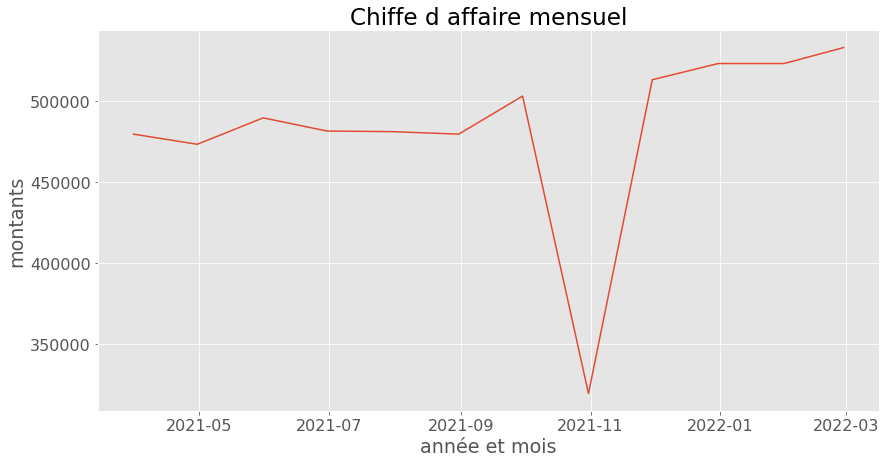

In [45]:
#chiffre d'affaire par mois 
plt.plot(Ventes_mois["price"])
plt.title("Chiffe d affaire mensuel")
plt.xlabel('année et mois')
plt.ylabel('montants')

# les chiffres d'affaire diminue de manier spectaculaire,on va ensuite regarder d'où vient le problème en commençant par le mois octobre 

In [46]:
# observation du mois de octobre 
Ventes_produits[(Ventes_produits.date > '2021-10-02') & (Ventes_produits.date < '2021-10-28')]

,id_prod,date,session_id,client_id,sex,birth,now_year,Age,price,categ
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,2022,59,4.20,0.0
10,0_423,2021-10-09 23:50:33.907269,s_102501,c_2225,f,1949,2022,73,1.99,0.0
12,0_1368,2021-10-02 10:50:43.188179,s_98886,c_857,m,1985,2022,37,5.13,0.0
14,0_1207,2021-10-12 23:22:51.290635,s_103927,c_648,m,1976,2022,46,16.99,0.0
17,0_1452,2021-10-15 10:07:12.401758,s_105078,c_6297,f,1969,2022,53,13.77,0.0
...,...,...,...,...,...,...,...,...,...,...
336963,0_1452,2021-10-07 02:17:30.221167,s_101119,c_1938,f,1979,2022,43,13.77,0.0
336967,0_1159,2021-10-25 11:55:26.814430,s_109915,c_772,f,1996,2022,26,7.99,0.0
336972,0_1008,2021-10-24 18:24:48.407163,s_109564,c_4468,f,1983,2022,39,4.73,0.0
336996,0_1526,2021-10-05 16:45:36.045702,s_100453,c_6341,m,1975,2022,47,6.62,0.0


In [47]:
# observation du mois de octobre 
octobre=Ventes_produits[(Ventes_produits.date > '2021-10-02') & (Ventes_produits.date < '2021-10-28')]
octobre

,id_prod,date,session_id,client_id,sex,birth,now_year,Age,price,categ
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,2022,59,4.20,0.0
10,0_423,2021-10-09 23:50:33.907269,s_102501,c_2225,f,1949,2022,73,1.99,0.0
12,0_1368,2021-10-02 10:50:43.188179,s_98886,c_857,m,1985,2022,37,5.13,0.0
14,0_1207,2021-10-12 23:22:51.290635,s_103927,c_648,m,1976,2022,46,16.99,0.0
17,0_1452,2021-10-15 10:07:12.401758,s_105078,c_6297,f,1969,2022,53,13.77,0.0
...,...,...,...,...,...,...,...,...,...,...
336963,0_1452,2021-10-07 02:17:30.221167,s_101119,c_1938,f,1979,2022,43,13.77,0.0
336967,0_1159,2021-10-25 11:55:26.814430,s_109915,c_772,f,1996,2022,26,7.99,0.0
336972,0_1008,2021-10-24 18:24:48.407163,s_109564,c_4468,f,1983,2022,39,4.73,0.0
336996,0_1526,2021-10-05 16:45:36.045702,s_100453,c_6341,m,1975,2022,47,6.62,0.0


In [48]:
#le mois de septembre
sept=Ventes_produits[(Ventes_produits.date > '2021-09-01') & (Ventes_produits.date < '2021-09-30')]
sept

,id_prod,date,session_id,client_id,sex,birth,now_year,Age,price,categ
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,2022,43,10.71,1.0
5,0_1085,2021-09-15 05:47:48.215162,s_90139,c_2526,f,1982,2022,40,3.99,0.0
7,0_1627,2021-09-19 14:54:52.410362,s_92294,c_1422,f,1980,2022,42,3.99,0.0
34,0_1458,2021-09-14 02:15:50.658467,s_89579,c_316,f,1966,2022,56,6.55,0.0
47,0_1425,2021-09-01 04:54:00.361282,s_83425,c_4555,m,1999,2022,23,12.99,0.0
...,...,...,...,...,...,...,...,...,...,...
336936,0_1792,2021-09-02 04:25:48.240021,s_83868,c_1478,f,1972,2022,50,8.79,0.0
336938,1_708,2021-09-21 16:43:04.136261,s_93315,c_7646,f,1973,2022,49,23.06,1.0
336942,1_397,2021-09-04 23:21:43.814972,s_85144,c_527,f,1988,2022,34,18.99,1.0
336954,1_21,2021-09-07 13:09:31.596812,s_86335,c_5203,m,2002,2022,20,22.99,1.0


In [49]:
spt_categ_1 = sept.loc[sept['categ']==1,:]
spt_categ_1

,id_prod,date,session_id,client_id,sex,birth,now_year,Age,price,categ
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,2022,43,10.71,1.0
81,1_369,2021-09-15 20:03:08.217907,s_90440,c_2538,m,1973,2022,49,23.99,1.0
90,1_559,2021-09-12 18:30:36.698626,s_88915,c_5689,m,1979,2022,43,24.99,1.0
114,1_280,2021-09-21 23:22:13.897127,s_93458,c_4504,m,2004,2022,18,15.59,1.0
168,1_283,2021-09-14 18:07:42.425540,s_89897,c_8097,f,1968,2022,54,14.99,1.0
...,...,...,...,...,...,...,...,...,...,...
336911,1_451,2021-09-04 01:13:13.798824,s_84742,c_1963,f,1990,2022,32,20.99,1.0
336938,1_708,2021-09-21 16:43:04.136261,s_93315,c_7646,f,1973,2022,49,23.06,1.0
336942,1_397,2021-09-04 23:21:43.814972,s_85144,c_527,f,1988,2022,34,18.99,1.0
336954,1_21,2021-09-07 13:09:31.596812,s_86335,c_5203,m,2002,2022,20,22.99,1.0


In [50]:
spt_categ_1["price"].sum()

183693.33000000002

In [51]:
octobre.sort_values(by="session_id")

,id_prod,date,session_id,client_id,sex,birth,now_year,Age,price,categ
123338,0_1506,2021-10-04 18:49:57.033281,s_100000,c_6924,f,1985,2022,37,10.00,0.0
285490,0_1160,2021-10-04 19:36:44.118781,s_100003,c_8020,m,1973,2022,49,17.87,0.0
147256,0_2032,2021-10-04 19:27:50.709593,s_100003,c_8020,m,1973,2022,49,23.32,0.0
66131,0_385,2021-10-04 19:05:04.915134,s_100003,c_8020,m,1973,2022,49,9.99,0.0
36115,0_170,2021-10-04 19:24:47.782204,s_100004,c_3034,f,1981,2022,41,9.92,0.0
...,...,...,...,...,...,...,...,...,...,...
32376,0_1362,2021-10-04 18:58:49.228317,s_99996,c_4900,f,1974,2022,48,11.30,0.0
91103,0_1197,2021-10-04 18:45:38.003516,s_99997,c_3521,f,1979,2022,43,6.99,0.0
8129,0_1604,2021-10-04 19:00:20.030388,s_99998,c_2795,f,1978,2022,44,17.51,0.0
143919,0_1411,2021-10-04 18:50:59.099942,s_99998,c_2795,f,1978,2022,44,8.99,0.0


In [52]:
#filtrage entre deux dates 
Ventes_produits_finale = Ventes_produits[(Ventes_produits.date <= '2021-09-30') | (Ventes_produits.date >= '2021-11-01')]
Ventes_produits_finale

,id_prod,date,session_id,client_id,sex,birth,now_year,Age,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,2022,45,4.99,0.0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,2022,22,65.75,2.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,2022,43,10.71,1.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,2022,42,8.99,0.0
5,0_1085,2021-09-15 05:47:48.215162,s_90139,c_2526,f,1982,2022,40,3.99,0.0
...,...,...,...,...,...,...,...,...,...,...
337010,1_498,2022-02-03 01:39:15.793010,s_159138,c_1857,f,1990,2022,32,23.37,1.0
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,2022,53,31.99,1.0
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,2022,31,22.99,0.0
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,2022,54,11.03,0.0


In [53]:
#trie par date
Ventes_produits_finale.sort_values(by="date")

,id_prod,date,session_id,client_id,sex,birth,now_year,Age,price,categ
176588,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,2022,55,11.99,0.0
95285,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,2022,62,19.37,0.0
216737,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,2022,34,4.50,0.0
180767,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,2022,33,6.55,0.0
293481,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,2022,66,16.49,0.0
...,...,...,...,...,...,...,...,...,...,...
208601,1_456,2022-02-28 23:56:57.196281,s_172422,c_5787,f,1986,2022,36,28.27,1.0
242599,1_370,2022-02-28 23:56:57.561424,s_172423,c_1460,m,1989,2022,33,13.11,1.0
6245,0_1538,2022-02-28 23:57:12.741573,s_172424,c_1876,m,1983,2022,39,8.61,0.0
301528,0_1403,2022-02-28 23:59:02.381670,s_172423,c_1460,m,1989,2022,33,15.99,0.0


In [54]:
#Ventes_produits_finale_chiffre d'affaire mansuel
Ventes_mois =Ventes_produits.groupby(pd.Grouper(key='date', freq='M')).sum()
Ventes_mois

,birth,now_year,Age,price,categ
date,,,,,
2021-03-31,56502988,57764496,1261508,479407.88,11764.0
2021-04-30,56208404,57455130,1246726,473129.82,10581.0
2021-05-31,55867629,57111390,1243761,489453.15,11413.0
2021-06-30,53048034,54228018,1179984,481332.49,12602.0
2021-07-31,48894264,49975752,1081488,480941.26,13125.0
2021-08-31,50682958,51801618,1118660,479401.04,11850.0
2021-09-30,65777978,67263852,1485874,502899.08,11016.0
2021-10-31,42711852,43642848,930996,319234.51,3986.0
2021-11-30,55915655,57176094,1260439,512996.67,15062.0


In [55]:
# Ventes_produits_finale chiffre d'affaire mansuel sans le mois d'octobre 
Ventes_mois_S10 =Ventes_produits_finale.groupby(pd.Grouper(key='date', freq='M')).sum()
Ventes_mois_S10

,birth,now_year,Age,price,categ
date,,,,,
2021-03-31,56502988,57764496,1261508,479407.88,11764.0
2021-04-30,56208404,57455130,1246726,473129.82,10581.0
2021-05-31,55867629,57111390,1243761,489453.15,11413.0
2021-06-30,53048034,54228018,1179984,481332.49,12602.0
2021-07-31,48894264,49975752,1081488,480941.26,13125.0
2021-08-31,50682958,51801618,1118660,479401.04,11850.0
2021-09-30,63185321,64613010,1427689,484771.07,10636.0
2021-10-31,0,0,0,0.00,0.0
2021-11-30,55915655,57176094,1260439,512996.67,15062.0


# Mission 2 --- Analyse des données

In [56]:
#efface la ligne d'octobre
Vrai_date=Ventes_mois_S10.drop(pd.to_datetime('2021-10-31'))
Vrai_date

,birth,now_year,Age,price,categ
date,,,,,
2021-03-31,56502988,57764496,1261508,479407.88,11764.0
2021-04-30,56208404,57455130,1246726,473129.82,10581.0
2021-05-31,55867629,57111390,1243761,489453.15,11413.0
2021-06-30,53048034,54228018,1179984,481332.49,12602.0
2021-07-31,48894264,49975752,1081488,480941.26,13125.0
2021-08-31,50682958,51801618,1118660,479401.04,11850.0
2021-09-30,63185321,64613010,1427689,484771.07,10636.0
2021-11-30,55915655,57176094,1260439,512996.67,15062.0
2021-12-31,64105560,65561328,1455768,523012.23,14011.0


In [57]:
# taux de croissance de chiffre d'affaire mensuel
taux_croiss=Vrai_date["price"].pct_change().mean()
round(taux_croiss,3)

0.011

In [58]:
#chiffres d'affaire trimestre 1
trim1=479407.88+473129.82+489453.15
trim1

1441990.85

In [59]:
#chiffres d'affaire trimestre 2
trim2=481332.49+480941.26+479401.04
trim2

1441674.79

In [60]:
#chiffres d'affaire trimestre 3
trim3= 484771.07+512996.67+523012.23
trim3

1520779.97

In [61]:
#la moyenne de chiffre d'affaire mensuel 
my=Vrai_date["price"].mean()
round(my,2)

496392.02

In [62]:
#prévision de croissance de chiffre d'affaire du mois Avril
CA_avril=532858.03*(1+taux_croiss)
round(CA_avril,2)                        

538643.47

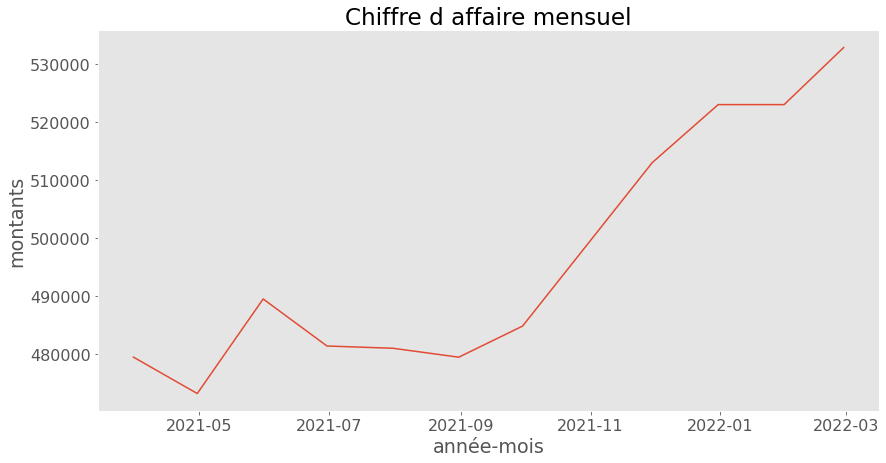

In [63]:
#Evolution de chiffre d'affaire mensuel
plt.plot(Vrai_date["price"])#créer une courbe 
plt.title("Chiffre d affaire mensuel")#titre
plt.xlabel('année-mois') #legender axes abscisses
plt.ylabel('montants')#legender axes ordonnées
plt.grid()

 #  indicateurs de tendance centrale et de dispersion

In [64]:
# description d'indicateur de tendance centrale (la moyenne,la médiane,moyenne des valeurs minimale et maximale)
# dispertion ( variance, l'écart-type et l'écart interquartile)
Ventes_produits_finale.describe()

,birth,now_year,Age,price,categ
count,313921.000000,313921.0,313921.000000,313921.000000,313921.000000
mean,1977.752543,2022.0,44.247457,17.393905,0.447479
std,13.610492,0.0,13.610492,17.886798,0.592921
min,1929.000000,2022.0,18.000000,0.620000,0.000000
25%,1970.000000,2022.0,35.000000,8.990000,0.000000
50%,1980.000000,2022.0,42.000000,13.990000,0.000000
75%,1987.000000,2022.0,52.000000,19.040000,1.000000
max,2004.000000,2022.0,93.000000,300.000000,2.000000


In [65]:
#calcule des tendance centrale 
moyenne_prix=Ventes_produits_finale['price'].mean() #moyenne de prix
médiane =Ventes_produits_finale['price'].median()# médiane 
mode=Ventes_produits_finale['price'].mode() # mode 
variance=Ventes_produits_finale['price'].var()# variance 
écart_type=Ventes_produits_finale['price'].std() # écart-type 

In [66]:
#moyenne de prix
moyenne_prix

17.393905473103395

In [67]:
#médiane
médiane

13.99

In [68]:
#mode
mode

0    15.99
dtype: float64

In [69]:
#variance 
variance

319.9375441989987

In [70]:
écart_type

17.886798042103532

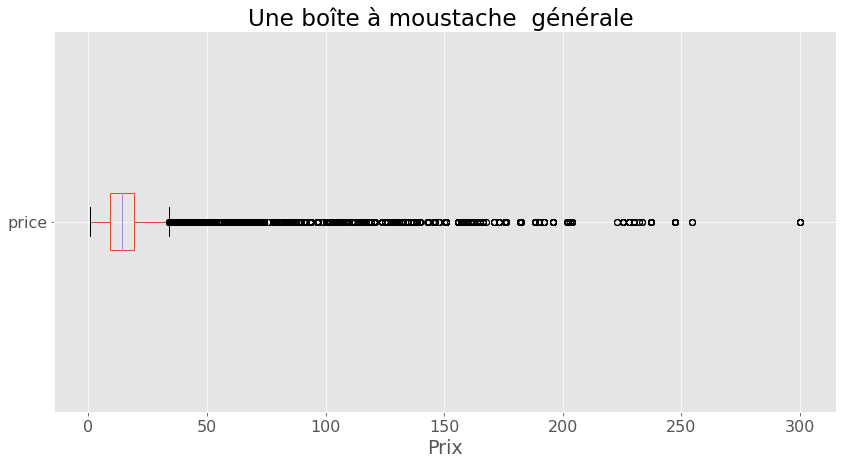

In [71]:
#disperition des achats
Ventes_produits_finale.boxplot(column="price",vert=False) #création d'une boîte à moustache 
plt.title("Une boîte à moustache  générale ") #titre
plt.xlabel('Prix') # abscisse 
plt.show()      # Affiche l'histogramme

# Mesure de concentration

In [72]:
# mesure de concentration d'étudier la densité des données autour de la valeur centrale.
Chiffre_affaires = Ventes_produits_finale[Ventes_produits_finale['price'] > 0]
CA = Ventes_produits_finale['price'].values
n = len(CA)
lorenz = np.cumsum(np.sort(CA)) / CA.sum()

In [73]:
# Gini est un indicateur synthétique d'inégalités de chiffre d'affaire il est 0 pour l'égalité parfaite sinon proche de 1 
AUC = (lorenz.sum()-lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
round(gini,2)

0.39

In [74]:
#ratio des catégories 
ratio_categ=Ventes_produits_finale['categ'].value_counts()
prop_categ =round(ratio_categ/ratio_categ.sum(),2)
prop_categ

0.0    0.60
1.0    0.34
2.0    0.05
Name: categ, dtype: float64

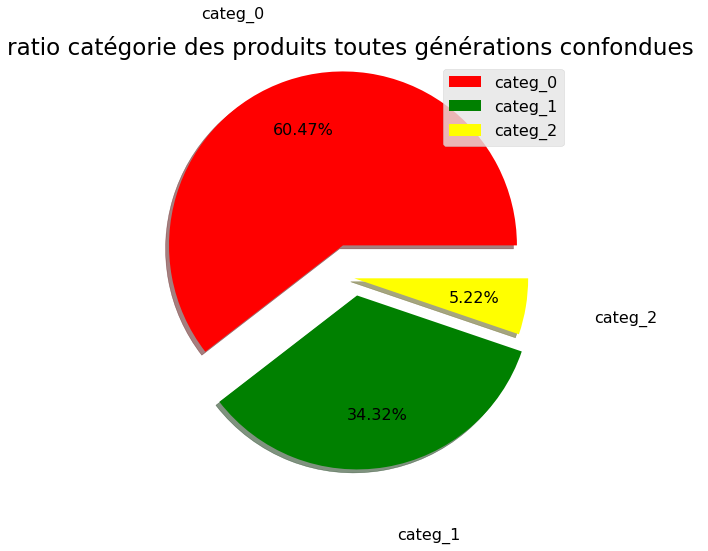

In [75]:
#visualisation de ratio de catégorie
plt.figure(figsize = (8, 8))
plt.pie(ratio_categ, labels = ['categ_0','categ_1','categ_2'],
           colors = ['red', 'green', 'yellow'],
           explode = [0.2, 0.1, 0],
           autopct = lambda ratio_categ: str(round(ratio_categ, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.4,
           shadow = True)
plt.title('ratio catégorie des produits toutes générations confondues ')
plt.legend()

In [76]:
#identifier tout les ventes dont le categ est Zéro 
categ_0 = Ventes_produits_finale.loc[Ventes_produits['categ']==0,:]
categ_0

,id_prod,date,session_id,client_id,sex,birth,now_year,Age,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,2022,45,4.99,0.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,2022,42,8.99,0.0
5,0_1085,2021-09-15 05:47:48.215162,s_90139,c_2526,f,1982,2022,40,3.99,0.0
6,0_1508,2021-08-29 05:39:01.055455,s_82100,c_5799,f,1962,2022,60,8.03,0.0
7,0_1627,2021-09-19 14:54:52.410362,s_92294,c_1422,f,1980,2022,42,3.99,0.0
...,...,...,...,...,...,...,...,...,...,...
337005,0_2098,2021-04-21 18:52:32.218210,s_23778,c_6990,f,1986,2022,36,14.37,0.0
337009,0_1475,2021-07-22 13:47:39.400914,s_65686,c_5607,m,1950,2022,72,11.99,0.0
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,2022,31,22.99,0.0
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,2022,54,11.03,0.0


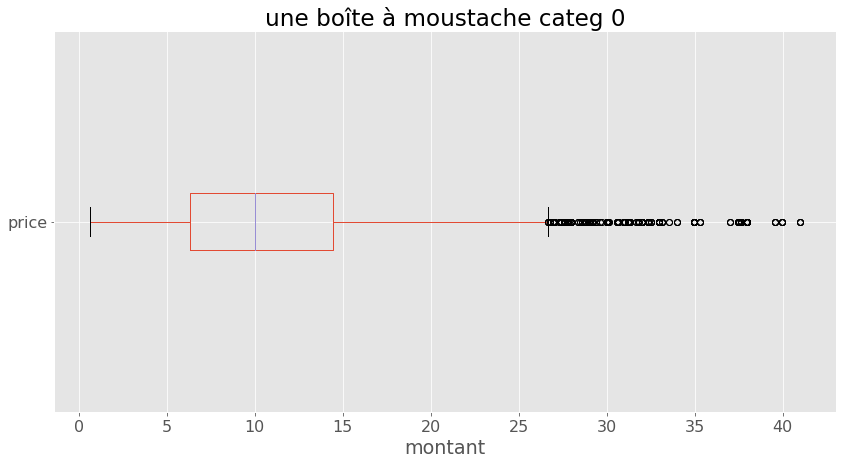

In [77]:
categ_0.boxplot(column="price",vert=False) #création d'une boîte à moustache 
plt.title('une boîte à moustache categ 0') #mettre de titre
plt.xlabel('montant') #
plt.show()      # Affiche l'histogramme

In [78]:
# courbe de lorenz de categ 0
Chiffre_aff = categ_0[categ_0['price'] > 0]
CT = categ_0['price'].values
n = len(CT)
lorenz_0 = np.cumsum(np.sort(CT)) / CT.sum()

In [79]:
# Gini est un indicateur synthétique d'inégalités de chiffre d'affaire il est 0 pour l'égalité parfaite sinon proche de 1 
AUC_0 = (lorenz_0.sum()-lorenz_0[-1]/2 -lorenz_0[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S_0 = 0.5 - AUC_0 # surface entre la première bissectrice et le courbe de Lorenz
gini_0 = 2*S_0
round(gini_0,2)

0.26

In [80]:
mode_0=categ_0['price'].mode() # mode
mode_0

0    4.99
dtype: float64

In [81]:
categ_0.describe()

,birth,now_year,Age,price,categ
count,189821.000000,189821.0,189821.000000,189821.000000,189821.0
mean,1978.089658,2022.0,43.910342,10.649787,0.0
std,11.212381,0.0,11.212381,4.931857,0.0
min,1929.000000,2022.0,18.000000,0.620000,0.0
25%,1973.000000,2022.0,36.000000,6.300000,0.0
50%,1980.000000,2022.0,42.000000,9.990000,0.0
75%,1986.000000,2022.0,49.000000,14.450000,0.0
max,2004.000000,2022.0,93.000000,40.990000,0.0


# indice de gini est de 0.26 soit proche de 0 que 1 ,c'està dire qu la répartitions de prix est presque égalitaire pour categ 0

In [82]:
#identifier tout les ventes dont le categ est 1
categ_1 = Ventes_produits_finale.loc[Ventes_produits['categ']==1,:]
categ_1

,id_prod,date,session_id,client_id,sex,birth,now_year,Age,price,categ
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,2022,43,10.71,1.0
15,1_281,2022-02-10 09:56:32.868016,s_162888,c_7099,f,1971,2022,51,23.99,1.0
16,1_285,2021-11-15 11:32:23.000489,s_119978,c_611,f,1987,2022,35,14.99,1.0
20,1_333,2021-12-17 06:22:03.132127,s_135611,c_615,m,1970,2022,52,15.99,1.0
23,1_644,2021-05-29 06:55:31.348787,s_41069,c_6781,m,1966,2022,56,25.79,1.0
...,...,...,...,...,...,...,...,...,...,...
337002,1_445,2021-11-24 16:28:40.455768,s_124454,c_5592,m,1989,2022,33,23.99,1.0
337007,1_282,2021-06-01 12:14:28.924898,s_42561,c_2945,f,1968,2022,54,23.20,1.0
337008,1_413,2022-01-10 13:47:23.973957,s_147795,c_3706,m,1987,2022,35,17.99,1.0
337010,1_498,2022-02-03 01:39:15.793010,s_159138,c_1857,f,1990,2022,32,23.37,1.0


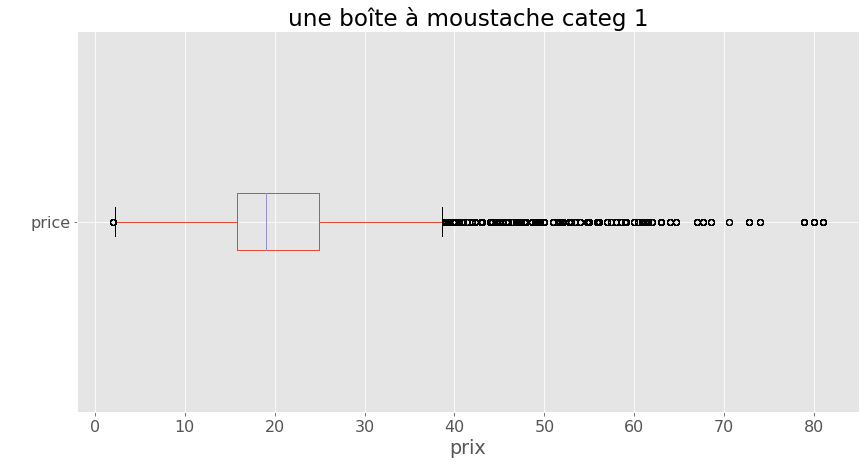

In [83]:
#une boîte à moustache categ 1
categ_1.boxplot(column="price",vert=False) #création d'une boîte à moustache 
plt.title('une boîte à moustache categ 1') #mettre le titre
plt.xlabel("prix")
plt.ylabel(" ")
plt.show()      # Affiche l'histogramme

In [84]:
categ_1["price"].sum()

2206701.64

In [85]:
#La courbe de Lorenz catégorie 1
Chiffre_aff_1 = categ_1[categ_1['price'] > 0]
CR = categ_1['price'].values
n = len(CR)
lorenz_1 = np.cumsum(np.sort(CR)) / CR.sum()
lorenz_1 = np.append([0],lorenz_1) # La courbe de Lorenz commence à 0

In [86]:
# Gini est un indicateur synthétique d'inégalités de chiffre d'affaire il est 0 pour l'égalité parfaite sinon proche de 1 
AUC_1 = (lorenz_1.sum()-lorenz_1[-1]/2 -lorenz_1[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S_1 = 0.5 - AUC_1 # surface entre la première bissectrice et le courbe de Lorenz
gini_1 = 2*S_1
round(gini_1,2)

0.19

In [87]:
categ_1.describe()

,birth,now_year,Age,price,categ
count,107727.000000,107727.0,107727.000000,107727.000000,107727.0
mean,1974.341279,2022.0,47.658721,20.484202,1.0
std,15.508575,0.0,15.508575,7.576178,0.0
min,1929.000000,2022.0,18.000000,2.000000,1.0
25%,1964.000000,2022.0,36.000000,15.810000,1.0
50%,1975.000000,2022.0,47.000000,19.080000,1.0
75%,1986.000000,2022.0,58.000000,24.980000,1.0
max,2004.000000,2022.0,93.000000,80.990000,1.0


# indice de gini est de 0.19 soit proche de 0 que 1 ,c'està dire qu la répartitions de prix est presque égalitaire pour le catg 1

In [88]:
#identifier tout les ventes dont le categ est deux 
categ_2 = Ventes_produits_finale.loc[Ventes_produits['categ']==2,:]
categ_2

,id_prod,date,session_id,client_id,sex,birth,now_year,Age,price,categ
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,2022,22,65.75,2.0
27,2_135,2021-05-26 01:46:59.530702,s_39581,c_5192,m,1965,2022,57,68.99,2.0
73,2_208,2021-08-21 21:58:40.983725,s_78917,c_7881,m,1996,2022,26,54.87,2.0
111,2_139,2022-01-16 13:39:40.278930,s_150675,c_8517,f,2000,2022,22,82.99,2.0
132,2_62,2021-08-28 05:50:46.906391,s_81697,c_7806,f,1994,2022,28,60.96,2.0
...,...,...,...,...,...,...,...,...,...,...
336876,2_208,2021-08-01 16:13:45.052960,s_70014,c_3158,f,1998,2022,24,54.87,2.0
336879,2_185,2022-02-20 20:57:29.169089,s_168298,c_139,f,1998,2022,24,43.99,2.0
336930,2_46,2021-09-15 21:45:35.710412,s_90471,c_6458,m,2004,2022,18,41.31,2.0
336995,2_224,2021-06-18 10:49:10.960641,s_50302,c_4958,m,1999,2022,23,87.40,2.0


In [89]:
categ_2.describe()

,birth,now_year,Age,price,categ
count,16373.000000,16373.0,16373.000000,16373.000000,16373.0
mean,1996.288768,2022.0,25.711232,75.249337,2.0
std,9.501278,0.0,9.501278,39.207480,0.0
min,1930.000000,2022.0,18.000000,30.990000,2.0
25%,1994.000000,2022.0,20.000000,53.990000,2.0
50%,1999.000000,2022.0,23.000000,62.830000,2.0
75%,2002.000000,2022.0,28.000000,71.210000,2.0
max,2004.000000,2022.0,92.000000,300.000000,2.0


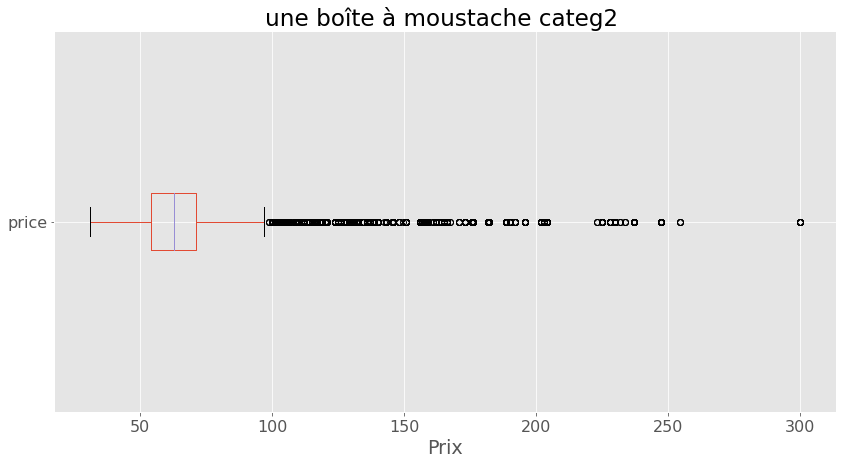

In [90]:
#une boîte à moustache categ 2
categ_2.boxplot(column="price",vert=False) #création d'une boîte à moustache 
plt.title('une boîte à moustache categ2 ')
plt.xlabel('Prix')
plt.ylabel('')
plt.show()      # Affiche l'histogramme

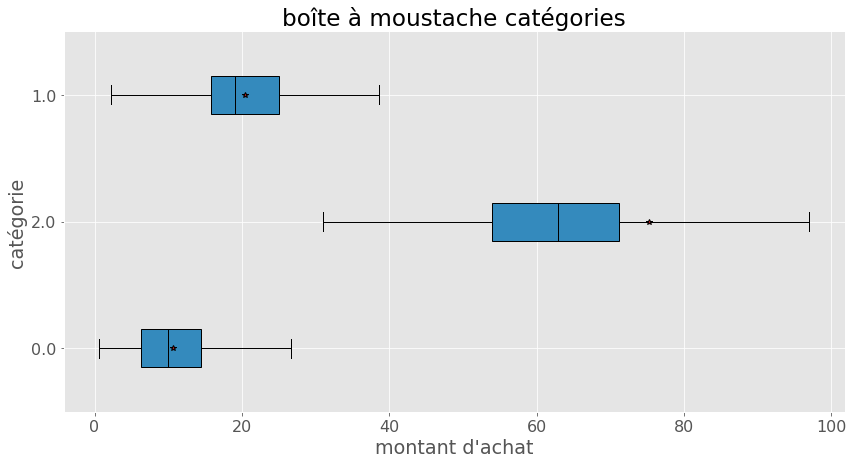

In [91]:
#boite à moustache des 3 catégories 0,1,2
X = "categ" 
Y = "price" 

# On ne garde que les dépenses
sous_echantillon =  Ventes_produits_finale[ Ventes_produits_finale["price"] > 0].copy()
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'*', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.ylabel("catégorie")
plt.xlabel("montant d'achat")
plt.title("boîte à moustache catégories")
plt.show()
#le categ 0 a le prix leplus petit et le categ 2 a ple produit plus cher de magasin ,

# pour les produits de catégories 1 ,soit la moitie est moins de 20€ et les prix variees entre 2 et 80 et ma moitie coute moins de 19 à 2et l'autre moitie plusde 19 à 80
# pour les produits de catégorie 2  ,des prixentre 30 et 300 ,ici la moitie coute moins de 62 à 30 et l'autres plus de 62 à 300
# pourles produits de catégorie 0, lesprix compris entre 0.6 et 40 et la moitie de produits est inferieur à 10 et l'autre moitie est superieur à 10 

In [92]:
#La courbe de Lorenz catégorie 2
Chiffre_aff_2 = categ_2[categ_2['price'] > 0]
CK = Chiffre_aff_2['price'].values
nk= len(CR)
lorenz_2 = np.cumsum(np.sort(CK)) / CK.sum()
lorenz_2 = np.append([0],lorenz_2) # La courbe de Lorenz commence à 0

In [93]:
# Gini est un indicateur synthétique d'inégalités de chiffre d'affaire il est 0 pour l'égalité parfaite sinon proche de 1 
AUC_2 = (lorenz_2.sum()-lorenz_2[-1]/2 -lorenz_2[0]/2)/nk # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S_2 = 0.5 - AUC_2 # surface entre la première bissectrice et le courbe de Lorenz
gini_2 = 2*S
round(gini_2,2)

0.39

# indice de gini est de 0.17 soit proche de 0 que 1 ,c'està dire qu la répartitions de prix est presque égalitaire pour le catg 2

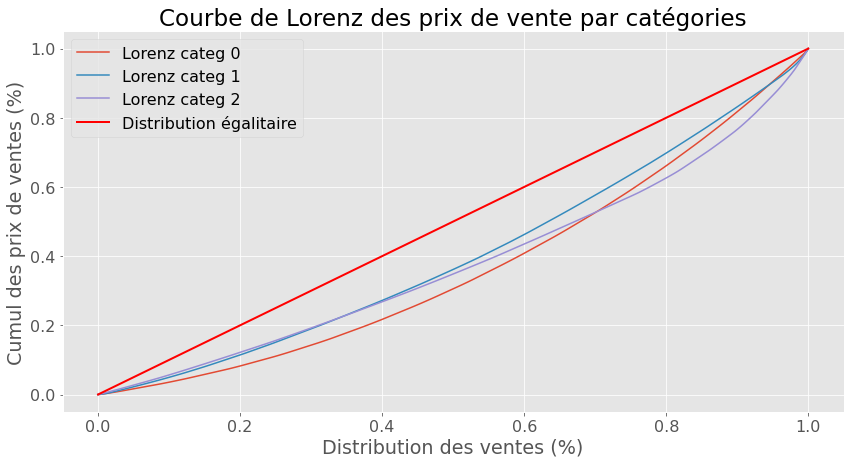

In [94]:
#Courbe de Lorenz des prix de vente par catégories

#Courbe de Lorenz sur la variables des prix par catégories
price_categ_0 =Ventes_produits_finale[Ventes_produits_finale['categ'] == 0]['price'].values
price_categ_1 = Ventes_produits_finale[Ventes_produits_finale['categ'] == 1]['price'].values
price_categ_2 = Ventes_produits_finale[Ventes_produits_finale['categ'] == 2]['price'].values
#Sélection du sous-échantillon de travail que l'on appelle price

#On place les observations dans une variable
lorenz_price_0 = np.cumsum(np.sort(price_categ_0)) / price_categ_0.sum()
lorenz_price_1 = np.cumsum(np.sort(price_categ_1)) / price_categ_1.sum()
lorenz_price_2 = np.cumsum(np.sort(price_categ_2)) / price_categ_2.sum()
#Tri des individus dans l'ordre croissant des valeurs de la variable, 
#calcul de la somme cumulée et normalisation en divisant par la somme des observations

plt.plot(np.linspace(0,1,len(lorenz_price_0)), lorenz_price_0, drawstyle='steps-post', label='Lorenz categ 0')
plt.plot(np.linspace(0,1,len(lorenz_price_1)), lorenz_price_1, drawstyle='steps-post', label='Lorenz categ 1')
plt.plot(np.linspace(0,1,len(lorenz_price_2)), lorenz_price_2, drawstyle='steps-post', label='Lorenz categ 2')

plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')

plt.title('Courbe de Lorenz des prix de vente par catégories')
plt.xlabel("Distribution des ventes (%)")
plt.ylabel("Cumul des prix de ventes (%)")
plt.legend(loc='upper left')
plt.show()

# ici on remarque que la courbe de categ1 et plus égalitaire que la courbe de categ 0 alors que categ 0 est table et moins égalitaire 

In [95]:
#ratio de femmes et hommes 
Sex=Ventes_produits_finale['sex'].value_counts()
ratio =Sex/Sex.sum()
ratio

m    0.501585
f    0.498415
Name: sex, dtype: float64

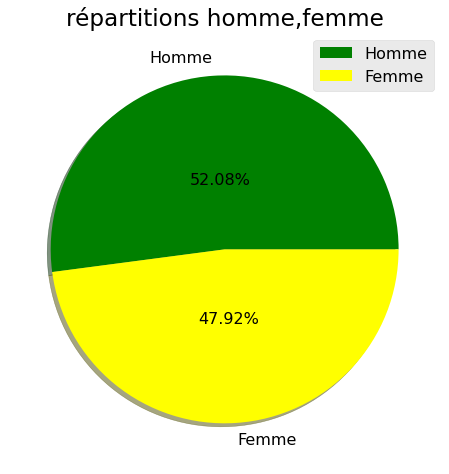

In [96]:
#visualisation de ratio homme ,femme
plt.figure(figsize = (8, 8))
plt.pie(sex, labels = ['Homme', 'Femme'],
           colors = [ 'green', 'yellow'],
           explode = [0, 0],
           autopct = lambda sex: str(round(sex, 2)) + '%',
           pctdistance = 0.4, labeldistance = 1.1,
           shadow = True)
plt.title("répartitions homme,femme")
plt.legend()

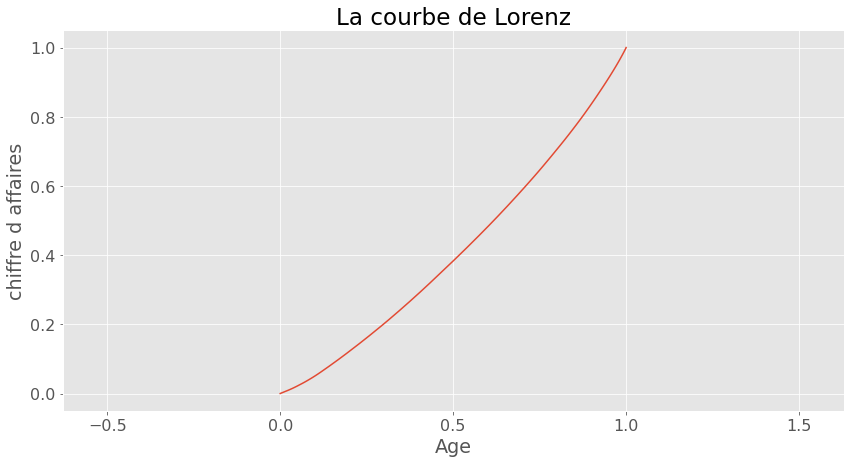

In [97]:
Client_age = Ventes_produits_finale[Ventes_produits_finale['Age'] < 0]
C_a = Ventes_produits_finale['Age'].values
n = len(C_a)
lorenz = np.cumsum(np.sort(C_a)) / C_a.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.title("La courbe de Lorenz")
plt.xlabel('Age')
plt.ylabel('chiffre d affaires')
plt.show()

In [98]:
# Gini est un indicateur synthétique d'inégalités de chiffre d'affaire il est 0 pour l'égalité parfaite sinon proche de 1 
AUC = (lorenz.sum()-lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
round(gini,2)

0.17

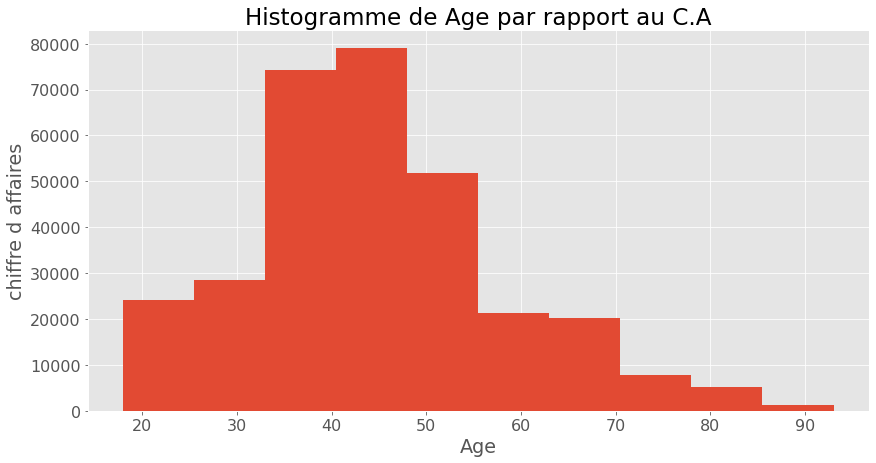

In [99]:
#l'age par rapport au chiffre d'affaire 
Ventes_produits_finale.hist(column='Age')
plt.title("Histogramme de Age par rapport au C.A")
plt.xlabel('Age')
plt.ylabel('chiffre d affaires')
plt.show()

# ici on voit que le chiffre d'affaire de plus de 50 000 est réaliser par la tranche d'age entre 35 ans et 55 ans 

# L’axe produits

In [100]:
Vrai_date

,birth,now_year,Age,price,categ
date,,,,,
2021-03-31,56502988,57764496,1261508,479407.88,11764.0
2021-04-30,56208404,57455130,1246726,473129.82,10581.0
2021-05-31,55867629,57111390,1243761,489453.15,11413.0
2021-06-30,53048034,54228018,1179984,481332.49,12602.0
2021-07-31,48894264,49975752,1081488,480941.26,13125.0
2021-08-31,50682958,51801618,1118660,479401.04,11850.0
2021-09-30,63185321,64613010,1427689,484771.07,10636.0
2021-11-30,55915655,57176094,1260439,512996.67,15062.0
2021-12-31,64105560,65561328,1455768,523012.23,14011.0


In [101]:
categ_0.describe()

,birth,now_year,Age,price,categ
count,189821.000000,189821.0,189821.000000,189821.000000,189821.0
mean,1978.089658,2022.0,43.910342,10.649787,0.0
std,11.212381,0.0,11.212381,4.931857,0.0
min,1929.000000,2022.0,18.000000,0.620000,0.0
25%,1973.000000,2022.0,36.000000,6.300000,0.0
50%,1980.000000,2022.0,42.000000,9.990000,0.0
75%,1986.000000,2022.0,49.000000,14.450000,0.0
max,2004.000000,2022.0,93.000000,40.990000,0.0


# Représentants des ventes

Text(0, 0.5, 'chiffre d affaires')

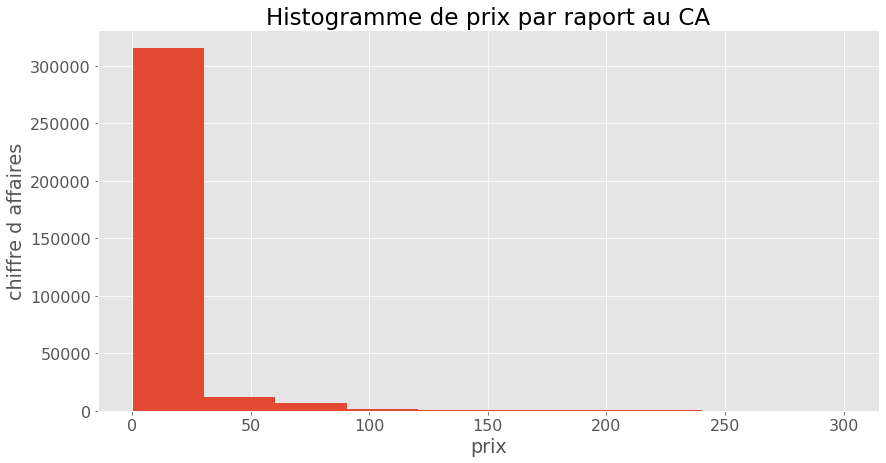

In [102]:
#ici on voit que le chiffre d'affaire est plus eleve entre les produits  0.62 et à peu pres 30 €
Ventes_produits.hist(column='price')
plt.title("Histogramme de prix par raport au CA")
plt.xlabel('prix')
plt.ylabel('chiffre d affaires')

# ici on voit que les produits qui produit beacoup de chiffre f'affaire on un prix entre 0.62 et 20

# Canaux de vente

In [103]:
#nombre de clients
Ventes_produits_finale["client_id"].count()

313921

In [104]:
#identifier tout les vente femmes 
Ventes_femme = Ventes_produits_finale.loc[Ventes_produits_finale['sex']=='f',:]
Ventes_femme

,id_prod,date,session_id,client_id,sex,birth,now_year,Age,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,2022,45,4.99,0.0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,2022,22,65.75,2.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,2022,43,10.71,1.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,2022,42,8.99,0.0
5,0_1085,2021-09-15 05:47:48.215162,s_90139,c_2526,f,1982,2022,40,3.99,0.0
...,...,...,...,...,...,...,...,...,...,...
337005,0_2098,2021-04-21 18:52:32.218210,s_23778,c_6990,f,1986,2022,36,14.37,0.0
337007,1_282,2021-06-01 12:14:28.924898,s_42561,c_2945,f,1968,2022,54,23.20,1.0
337010,1_498,2022-02-03 01:39:15.793010,s_159138,c_1857,f,1990,2022,32,23.37,1.0
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,2022,54,11.03,0.0


In [105]:
#nombre de clients femmes
Ventes_femme["client_id"].count()

156463

In [106]:
#chiffres d'affaires de femmes
Ch_af_f=Ventes_femme['price'].sum()
Ch_af_f

2696473.25

In [107]:
#ratio categ produit femme
categ_f=Ventes_femme['categ'].value_counts()
ratio_f =categ_f/categ_f.sum()
round(ratio_f,2)

0.0    0.60
1.0    0.35
2.0    0.05
Name: categ, dtype: float64

In [108]:
#vente femme categorie 0
Ventes_femmes_categ_0= Ventes_femme.loc[Ventes_femme['categ']==0,:]

In [109]:
#Chiffre d'affaire categ0 femmes 
V_f_cat_0=Ventes_femmes_categ_0['price'].sum()
V_f_cat_0

1002412.96

In [110]:
#vente femme categ 1
Ventes_femmes_categ_1= Ventes_femme.loc[Ventes_femme['categ']==1,:]

In [111]:
#Chiffre d'affaire categ 1 femmes 
V_f_cat_1=Ventes_femmes_categ_1['price'].sum()
V_f_cat_1

1118225.58

In [112]:
#vente femme categorie 2
Ventes_femmes_categ_2= Ventes_femme.loc[Ventes_femme['categ']==2,:]

In [113]:
#Chiffre d'affaire categ 2 femmes 
V_f_cat_2=Ventes_femmes_categ_2['price'].sum()
V_f_cat_2

575834.71

In [114]:
#vérification
V_f_cat_0+V_f_cat_1+V_f_cat_2

2696473.25

In [115]:
#identifier tout les vente hommes 
Ventes_homme = Ventes_produits_finale.loc[Ventes_produits_finale['sex']=='m',:]
Ventes_homme

,id_prod,date,session_id,client_id,sex,birth,now_year,Age,price,categ
11,0_1613,2021-06-11 18:01:45.863768,s_47281,c_220,m,1960,2022,62,8.99,0.0
20,1_333,2021-12-17 06:22:03.132127,s_135611,c_615,m,1970,2022,52,15.99,1.0
21,0_336,2021-07-10 04:48:50.708782,s_60294,c_3561,m,1991,2022,31,3.23,0.0
23,1_644,2021-05-29 06:55:31.348787,s_41069,c_6781,m,1966,2022,56,25.79,1.0
24,1_274,2022-02-09 04:57:29.344848,s_162284,c_4306,m,1964,2022,58,24.40,1.0
...,...,...,...,...,...,...,...,...,...,...
337004,0_1480,2021-03-28 01:40:24.785448,s_12413,c_6259,m,1991,2022,31,4.15,0.0
337008,1_413,2022-01-10 13:47:23.973957,s_147795,c_3706,m,1987,2022,35,17.99,1.0
337009,0_1475,2021-07-22 13:47:39.400914,s_65686,c_5607,m,1950,2022,72,11.99,0.0
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,2022,53,31.99,1.0


In [116]:
#nombre de clients hommes
Ventes_homme["client_id"].count()

157458

In [117]:
#chiffres d'affaires de hommes
Ch_af_m=Ventes_homme['price'].sum()
round(Ch_af_m,2)

2763838.95

In [118]:
#ratio categ hommes
categ_m=Ventes_homme['categ'].value_counts()
ratio_m =categ_m/categ_m.sum()
round(ratio_m,2)

0.0    0.61
1.0    0.34
2.0    0.06
Name: categ, dtype: float64

In [119]:
#vente homme cate 0
Ventes_homme_cat_0=Ventes_homme.loc[Ventes_homme['categ']==0,:]

In [120]:
#chiffres d'affaires de hommes categ 0
Ch_af_cat_0=Ventes_homme_cat_0['price'].sum()
round(Ch_af_cat_0,2)

1019140.2

In [121]:
#vente homme cate 1
Ventes_homme_cat_1=Ventes_homme.loc[Ventes_homme['categ']==1,:]
#chiffres d'affaires de hommes categ 1
Ch_af_cat_1=Ventes_homme_cat_1['price'].sum()
round(Ch_af_cat_1,2)

1088476.06

In [122]:
#vente homme cate 2
Ventes_homme_cat_2=Ventes_homme.loc[Ventes_homme['categ']==2,:]
#chiffres d'affaires de hommes categ 2
Ch_af_cat_2=Ventes_homme_cat_2['price'].sum()
round(Ch_af_cat_2,2)

656222.69

In [123]:
# verification
Ch_af_cat_0+Ch_af_cat_1+Ch_af_cat_2

2763838.9499999997

In [124]:
Ventes_mois_femme=Ventes_femme.groupby(pd.Grouper(key='date', freq='M')).sum()
Vrai_date_femme=Ventes_mois_femme.drop(pd.to_datetime('2021-10-31'))
Vrai_date_femme

,birth,now_year,Age,price,categ
date,,,,,
2021-03-31,27976432,28609278,632846,234922.96,5811.0
2021-04-30,28209588,28839786,630198,235685.18,5292.0
2021-05-31,28052807,28686114,633307,244326.84,5706.0
2021-06-30,26261672,26854182,592510,235784.24,6231.0
2021-07-31,24269041,24816006,546965,235394.72,6431.0
2021-08-31,25209721,25770390,560669,235524.91,5825.0
2021-09-30,31146725,31860654,713929,238166.25,5278.0
2021-11-30,27746316,28380792,634476,255387.83,7583.0
2021-12-31,31866229,32598684,732455,258132.55,7016.0


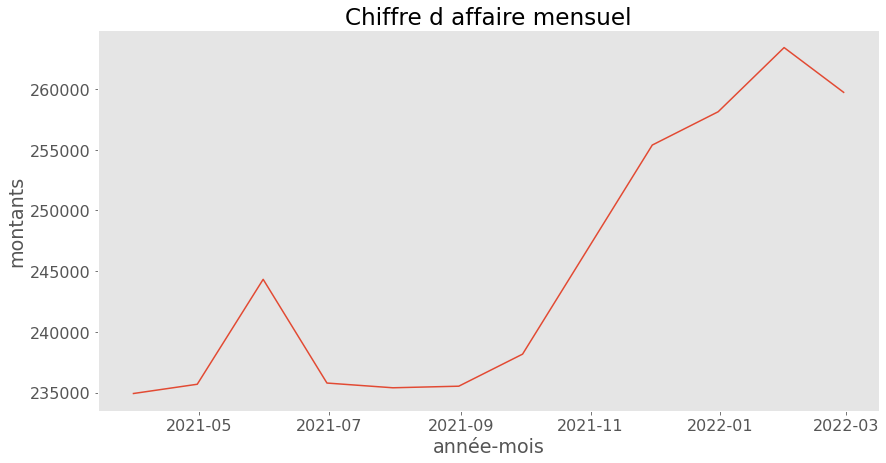

In [125]:
#Evolution de chiffre d'affaire mensuel femmes
plt.plot(Vrai_date_femme["price"])#créer une courbe 
plt.title("Chiffre d affaire mensuel")#titre
plt.xlabel('année-mois') #legender axes abscisses
plt.ylabel('montants')#legender axes ordonnées
plt.grid()

In [126]:
#chiffre d'affaire de homme 
Ventes_mois_homme=Ventes_femme.groupby(pd.Grouper(key='date', freq='M')).sum()
Vrai_date_homme=Ventes_mois_homme.drop(pd.to_datetime('2021-10-31'))
Vrai_date_homme

,birth,now_year,Age,price,categ
date,,,,,
2021-03-31,27976432,28609278,632846,234922.96,5811.0
2021-04-30,28209588,28839786,630198,235685.18,5292.0
2021-05-31,28052807,28686114,633307,244326.84,5706.0
2021-06-30,26261672,26854182,592510,235784.24,6231.0
2021-07-31,24269041,24816006,546965,235394.72,6431.0
2021-08-31,25209721,25770390,560669,235524.91,5825.0
2021-09-30,31146725,31860654,713929,238166.25,5278.0
2021-11-30,27746316,28380792,634476,255387.83,7583.0
2021-12-31,31866229,32598684,732455,258132.55,7016.0


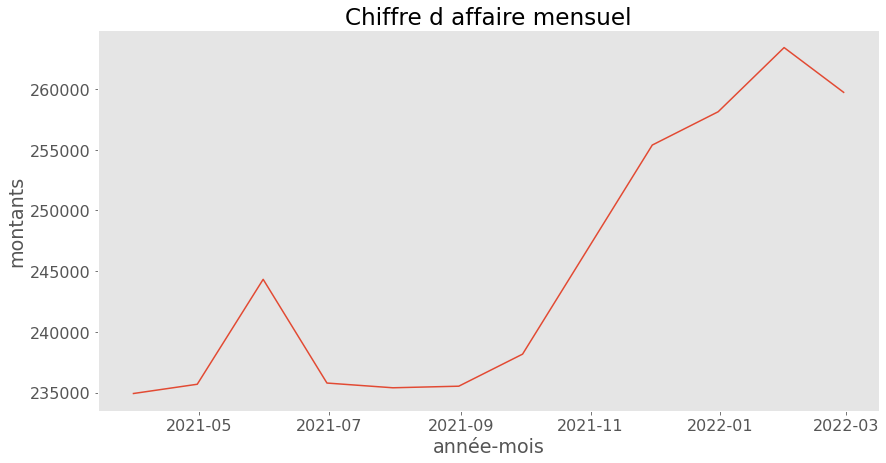

In [127]:
#Evolution de chiffre d'affaire mensuel homme
plt.plot(Vrai_date_homme["price"])#créer une courbe 
plt.title("Chiffre d affaire mensuel")#titre
plt.xlabel('année-mois') #legender axes abscisses
plt.ylabel('montants')#legender axes ordonnées
plt.grid()

In [128]:
#filtrage de clients des Aînés de plus de 65 ans 
adult_50pl = Ventes_produits_finale.loc[Ventes_produits_finale["Age"] > 65,:]
adult_50pl

,id_prod,date,session_id,client_id,sex,birth,now_year,Age,price,categ
22,0_2304,2021-11-02 23:57:37.632657,s_113918,c_6152,f,1952,2022,70,15.86,0.0
25,0_2033,2021-12-26 03:05:52.819661,s_140117,c_1407,f,1956,2022,66,14.99,0.0
29,1_333,2021-08-09 20:27:58.329230,s_73560,c_6706,f,1945,2022,77,15.99,1.0
44,0_2105,2021-04-30 21:57:04.036531,s_28127,c_221,m,1948,2022,74,5.99,0.0
57,1_383,2022-02-04 03:49:56.147696,s_159680,c_3061,f,1948,2022,74,28.99,1.0
...,...,...,...,...,...,...,...,...,...,...
336916,0_1085,2021-05-13 09:28:55.559477,s_33911,c_8387,f,1956,2022,66,3.99,0.0
336966,1_103,2021-12-04 01:20:45.117386,s_129051,c_3490,f,1942,2022,80,20.99,1.0
336988,1_493,2021-04-23 17:11:34.580572,s_24686,c_3366,f,1938,2022,84,10.99,1.0
336994,0_1691,2021-12-11 18:49:26.204219,s_132902,c_5581,f,1956,2022,66,14.99,0.0


In [129]:
# chiffre d'affaire mensuel de plus de 65 ans 
Ventes_mois_65pl=adult_50pl.groupby(pd.Grouper(key='date', freq='M')).sum()
Vrai_date_65pl=Ventes_mois_65pl.drop(pd.to_datetime('2021-10-31'))
Vrai_date_65pl

,birth,now_year,Age,price,categ
date,,,,,
2021-03-31,4580416,4751700,171284,38902.70,1293.0
2021-04-30,4235200,4393806,158606,34941.69,1101.0
2021-05-31,4564445,4735524,171079,37677.23,1191.0
2021-06-30,4407211,4571742,164531,38437.46,1335.0
2021-07-31,4076804,4230024,153220,35797.88,1276.0
2021-08-31,4071282,4223958,152676,34351.53,1152.0
2021-09-30,5133235,5325948,192713,41416.56,1324.0
2021-11-30,5100372,5291574,191202,45846.88,1779.0
2021-12-31,5847184,6066000,218816,50394.34,1819.0


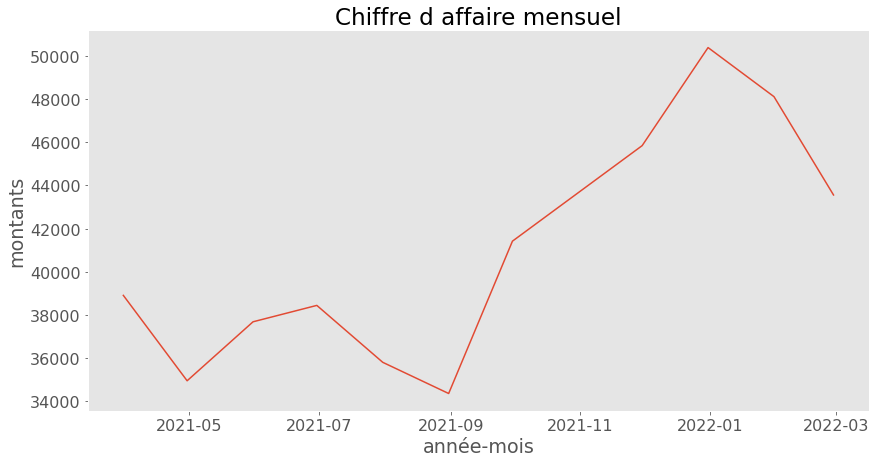

In [130]:
#Evolution de chiffre d'affaire mensuel de categage de plus de 65 ans 
plt.plot(Vrai_date_65pl["price"])#créer une courbe 
plt.title("Chiffre d affaire mensuel")#titre
plt.xlabel('année-mois') #legender axes abscisses
plt.ylabel('montants')#legender axes ordonnées
plt.grid()

In [131]:
#ratio  hommes et femmes de plus de 50 ans
ratio_pl50 = adult_50pl['sex'].value_counts()
rtio_pl =ratio_pl50/ratio_pl50.sum()
round(rtio_pl,2)

f    0.56
m    0.44
Name: sex, dtype: float64

In [132]:
mode_65=adult_50pl["price"].mode()
mode_65

0    15.99
dtype: float64

In [133]:
#ratio  catégorie de produit de plus de 50 ans
categ_pl50 = adult_50pl['categ'].value_counts()
cat_pl =categ_pl50/categ_pl50.sum()
round(cat_pl,2)

1.0    0.57
0.0    0.42
2.0    0.01
Name: categ, dtype: float64

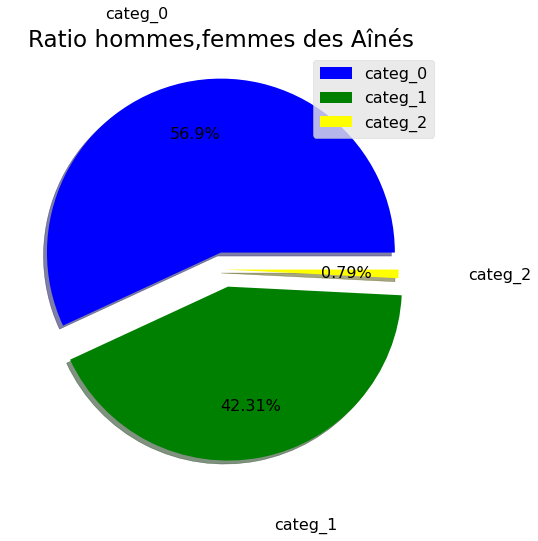

In [134]:
plt.figure(figsize = (8, 8))
plt.pie(categ_pl50, labels = ['categ_0', 'categ_1','categ_2'],
           colors = [ 'blue','green', 'yellow'],
           explode = [0.1,0.1,0],
           autopct = lambda categ_pl50: str(round(categ_pl50, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.4,
           shadow = True)
plt.title('Ratio hommes,femmes des Aînés ')
plt.legend()

In [135]:
#chiffre d'affaire de plus de 50 ans 
reslt=adult_50pl["price"].sum()
round(reslt,2)

449443.15

In [136]:
# calcule tandence centrale 
adult_50pl.describe()

,birth,now_year,Age,price,categ
count,26862.000000,26862.0,26862.000000,26862.000000,26862.000000
mean,1948.952051,2022.0,73.047949,16.731559,0.584841
std,6.471469,0.0,6.471469,9.918204,0.508597
min,1929.000000,2022.0,66.000000,0.620000,0.000000
25%,1945.000000,2022.0,68.000000,10.750000,0.000000
50%,1951.000000,2022.0,71.000000,15.990000,1.000000
75%,1954.000000,2022.0,77.000000,21.640000,1.000000
max,1956.000000,2022.0,93.000000,236.990000,2.000000


In [137]:
#filtrage de clients des adolescents soit - 24 ans 
adult_30moin = Ventes_produits_finale.loc[Ventes_produits_finale["Age"] < 24,:]
adult_30moin

,id_prod,date,session_id,client_id,sex,birth,now_year,Age,price,categ
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,2022,22,65.75,2.0
47,0_1425,2021-09-01 04:54:00.361282,s_83425,c_4555,m,1999,2022,23,12.99,0.0
78,1_406,2021-08-28 17:08:11.453695,s_81880,c_4555,m,1999,2022,23,24.81,1.0
100,1_661,2021-04-14 13:39:31.911997,s_20473,c_5168,f,2001,2022,21,22.99,1.0
103,1_406,2021-07-08 08:13:06.556329,s_59454,c_8106,m,2001,2022,21,24.81,1.0
...,...,...,...,...,...,...,...,...,...,...
336954,1_21,2021-09-07 13:09:31.596812,s_86335,c_5203,m,2002,2022,20,22.99,1.0
336964,1_369,2021-12-06 01:52:36.579122,s_130057,c_5173,f,2002,2022,20,23.99,1.0
336968,1_366,2021-06-01 01:13:57.462148,s_42355,c_1416,f,2000,2022,22,28.54,1.0
336995,2_224,2021-06-18 10:49:10.960641,s_50302,c_4958,m,1999,2022,23,87.40,2.0


In [138]:
#chiffre d'affaire mensuel de moins de 25 ans 
Ventes_mois_25=adult_30moin.groupby(pd.Grouper(key='date', freq='M')).sum()
Vrai_date_25=Ventes_mois_25.drop(pd.to_datetime('2021-10-31'))
Vrai_date_25

,birth,now_year,Age,price,categ
date,,,,,
2021-03-31,3429030,3463686,34656,69724.62,2029.0
2021-04-30,3421055,3455598,34543,73039.14,2059.0
2021-05-31,3489210,3524346,35136,79736.14,2221.0
2021-06-30,3639303,3675996,36693,77590.81,2283.0
2021-07-31,4093582,4134990,41408,93776.59,2774.0
2021-08-31,3785346,3823602,38256,93232.84,2571.0
2021-09-30,2772605,2800470,27865,47044.66,1414.0
2021-11-30,3728959,3766986,38027,75561.54,2286.0
2021-12-31,3433087,3467730,34643,54125.21,1735.0


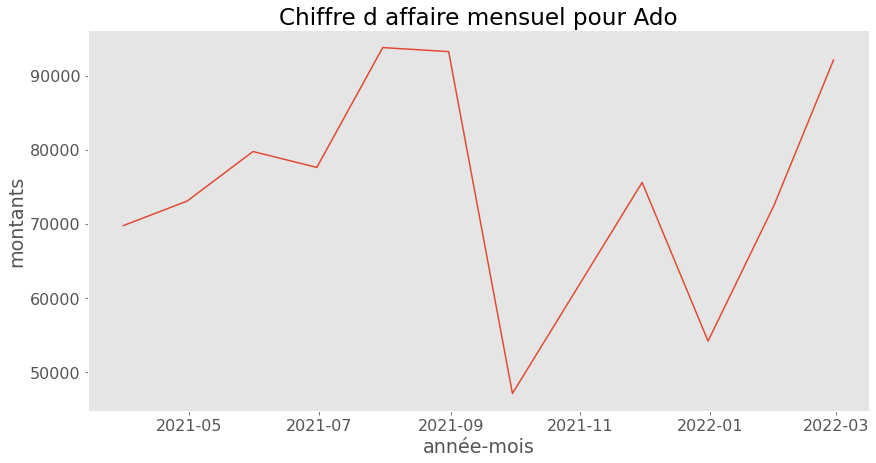

In [139]:
#Evolution de chiffre d'affaire mensuel des ados
plt.plot(Vrai_date_25["price"])#créer une courbe 
plt.title("Chiffre d affaire mensuel pour Ado")#titre
plt.xlabel('année-mois') #legender axes abscisses
plt.ylabel('montants')#legender axes ordonnées
plt.grid()

In [140]:
mode_ado=adult_30moin["price"].mode()
mode_ado

0    68.99
dtype: float64

In [141]:
#ratio  hommes et femmes de moins de 25 ans
ratio_m30 = adult_30moin['sex'].value_counts()
rtio_m =ratio_m30/ratio_m30.sum()
round(rtio_m,2)

m    0.55
f    0.45
Name: sex, dtype: float64

In [142]:
#ratio catégorie de moins de 25 ans
categ_m30 = adult_30moin['categ'].value_counts()
cat_m =categ_m30/categ_m30.sum()
round(cat_m,2)

2.0    0.42
1.0    0.38
0.0    0.20
Name: categ, dtype: float64

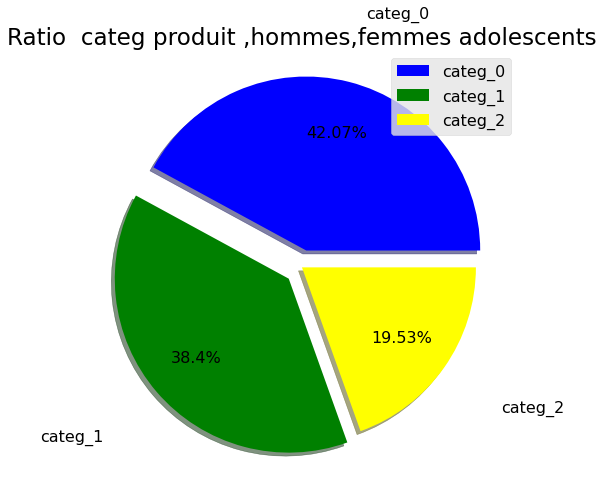

In [143]:
#camembert des ado achats categ
plt.figure(figsize = (8, 8))
plt.pie(categ_m30, labels = ['categ_0', 'categ_1','categ_2'],
           colors = [ 'blue','green', 'yellow'],
           explode = [0.1,0.1,0],
           autopct = lambda categ_m30: str(round(categ_m30, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.4,
           shadow = True)
plt.title('Ratio  categ produit ,hommes,femmes adolescents')
plt.legend()

In [144]:
#chiffre d'affaire de moins 30 ans
reslt_2 =adult_30moin["price"].sum()
round(reslt_2,2)

828384.44

In [145]:
#calcule de tendance centrale 
adult_30moin.describe()

,birth,now_year,Age,price,categ
count,19839.000000,19839.0,19839.000000,19839.000000,19839.000000
mean,2001.779273,2022.0,20.220727,41.755353,1.225364
std,2.031738,0.0,2.031738,38.972715,0.751830
min,1999.000000,2022.0,18.000000,0.810000,0.000000
25%,2000.000000,2022.0,18.000000,15.810000,1.000000
50%,2002.000000,2022.0,20.000000,26.050000,1.000000
75%,2004.000000,2022.0,22.000000,57.990000,2.000000
max,2004.000000,2022.0,23.000000,300.000000,2.000000


In [146]:
#filtrage de clients Adultes (25 à 64 ans)
#Ventes_produits_30_50 = Ventes_produits_finale[(Ventes_produits_finale['Age'] >= 25) & (Ventes_produits_finale['Age'] <= 65)]
#Ventes_produits_30_50

In [147]:
#filtrage de clients entre 30 et 50 ans 
Ventes_produits_30_50 = Ventes_produits_finale[Ventes_produits_finale['Age'].between(25,65)]
Ventes_produits_30_50

,id_prod,date,session_id,client_id,sex,birth,now_year,Age,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,2022,45,4.99,0.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,2022,43,10.71,1.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,2022,42,8.99,0.0
5,0_1085,2021-09-15 05:47:48.215162,s_90139,c_2526,f,1982,2022,40,3.99,0.0
6,0_1508,2021-08-29 05:39:01.055455,s_82100,c_5799,f,1962,2022,60,8.03,0.0
...,...,...,...,...,...,...,...,...,...,...
337010,1_498,2022-02-03 01:39:15.793010,s_159138,c_1857,f,1990,2022,32,23.37,1.0
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,2022,53,31.99,1.0
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,2022,31,22.99,0.0
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,2022,54,11.03,0.0


In [148]:
#chiffre d'affaire categ age 26-65
Ventes_mois_adult=Ventes_produits_30_50.groupby(pd.Grouper(key='date', freq='M')).sum()
Vrai_date_adult=Ventes_mois_adult.drop(pd.to_datetime('2021-10-31'))
Vrai_date_adult

,birth,now_year,Age,price,categ
date,,,,,
2021-03-31,48183852,49235700,1051848,364518.33,8252.0
2021-04-30,48194507,49243788,1049281,358116.36,7213.0
2021-05-31,47378410,48410724,1032314,362851.79,7735.0
2021-06-30,44573948,45547572,973624,356212.83,8708.0
2021-07-31,40310292,41192184,881892,340737.18,8782.0
2021-08-31,42390766,43313262,922496,341553.15,7843.0
2021-09-30,54997763,56201490,1203727,391042.73,7745.0
2021-11-30,46650760,47676738,1025978,382821.19,10733.0
2021-12-31,54431683,55629264,1197581,411812.19,10261.0


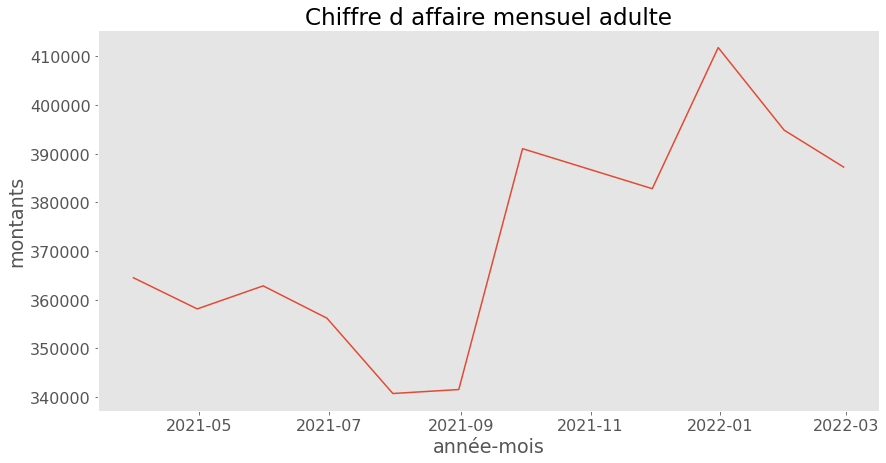

In [149]:
#Evolution de chiffre d'affaire mensuel categ age adulte
plt.plot(Vrai_date_adult["price"])#créer une courbe 
plt.title("Chiffre d affaire mensuel adulte")#titre
plt.xlabel('année-mois') #legender axes abscisses
plt.ylabel('montants')#legender axes ordonnées
plt.grid()

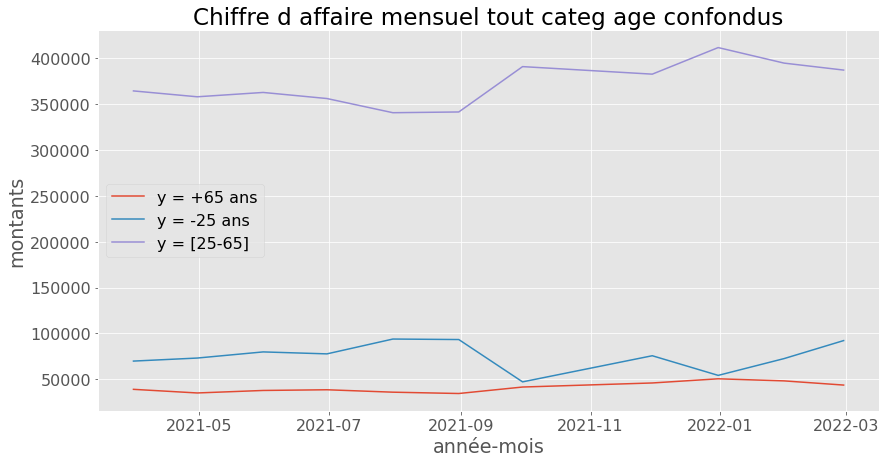

In [150]:
# table de Chiffre d affaire mensuel tout categ age confondus
plt.plot(Vrai_date_65pl["price"])
plt.plot(Vrai_date_25["price"])
plt.plot(Vrai_date_adult["price"])
plt.title("Chiffre d affaire mensuel tout categ age confondus")#titre
plt.xlabel('année-mois') #legender axes abscisses
plt.ylabel('montants')#legender axes ordonnées
plt.legend(['y = +65 ans', 'y = -25 ans', 'y = [25-65]'], loc='center left')


In [151]:
#ratio catégorie entre de 30 et 50 ans 
categ_30_50 = Ventes_produits_30_50['categ'].value_counts()
cat_entre =categ_30_50/categ_30_50.sum()
round(cat_entre,2)

0.0    0.66
1.0    0.32
2.0    0.03
Name: categ, dtype: float64

In [152]:
mode_adlt=Ventes_produits_30_50["price"].mode()
mode_adlt

0    15.99
dtype: float64

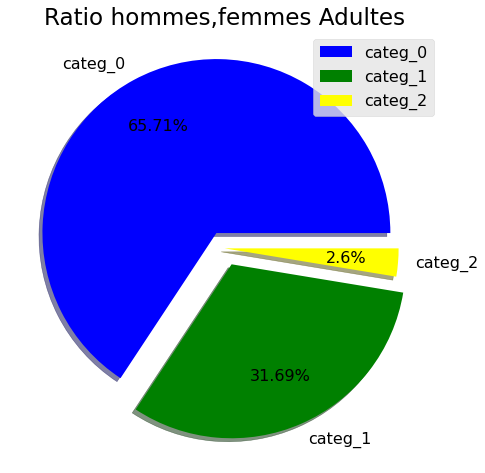

In [153]:
#visualisation de ratio homme,femme
plt.figure(figsize = (8, 8))
plt.pie(categ_30_50, labels = ['categ_0', 'categ_1','categ_2'],
           colors = [ 'blue','green', 'yellow'],
           explode = [0.1,0.1,0],
           autopct = lambda categ_30_50: str(round(categ_30_50, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.1,
           shadow = True)
plt.title('Ratio hommes,femmes Adultes')
plt.legend()

In [154]:
#ratio hommes ,femmes entre de 30 et 50 ans 
age_30_50 = Ventes_produits_30_50['sex'].value_counts()
age_entre =age_30_50/age_30_50.sum()
age_entre

m    0.504069
f    0.495931
Name: sex, dtype: float64

In [155]:
#chiffre d'affaire entre 30 et 40 ans
reslt_E =Ventes_produits_30_50["price"].sum()
round(reslt_E,2)

4091779.47

In [156]:
Ventes_produits_30_50.describe()

,birth,now_year,Age,price,categ
count,265027.000000,265027.0,265027.000000,265027.000000,265027.000000
mean,1978.705539,2022.0,43.294461,15.439104,0.368962
std,9.125876,0.0,9.125876,13.772674,0.533754
min,1957.000000,2022.0,25.000000,0.620000,0.000000
25%,1973.000000,2022.0,36.000000,8.220000,0.000000
50%,1980.000000,2022.0,42.000000,13.050000,0.000000
75%,1986.000000,2022.0,49.000000,18.310000,1.000000
max,1997.000000,2022.0,65.000000,300.000000,2.000000


In [157]:
#nous pouvons aussi insérer un champ calculé
# moyenne d'âge selon le sexe et les achats
#nous utilisons la fonction mean() 
moyen_age=pd.crosstab(Ventes_produits['sex'],Ventes_produits['price'],values=Ventes_produits['Age'],aggfunc=pd.Series.mean)
moyen_age

price,0.62,0.66,0.77,0.81,0.88,0.92,0.93,0.97,0.98,0.99,...,222.97,225.17,228.11,230.04,231.99,233.54,236.99,247.22,254.44,300.00
sex,,,,,,,,,,,,,,,,,,,,,
f,49.000000,38.0,46.0,36.5,40.0,45.5,41.666667,40.400,37.333333,45.5000,...,30.0,27.3125,21.250000,27.933333,27.0,18.0,25.052632,24.777778,18.000000,24.0
m,38.666667,49.0,36.5,32.8,44.5,47.0,32.000000,44.625,60.000000,45.4375,...,43.5,26.3000,23.333333,25.227273,18.0,24.5,23.714286,24.000000,23.333333,26.4


# ici on voit que des femmes de 49 ans en moyenne achetent le produit de 0.62 contre 37 ans des hommes et les femmes de 30 ans  achetent en moyenne les produit qui vaut 223€ contre 44 ans  des hommes enfin on a que en moyenne les femmes de 24 ans contre 26 ansde moyennes pour les hommes qui achetes les produits de 300€ 

In [158]:
X = "categ" # qualitative
Y = "price" # quantitative

# On ne garde que les dépenses
sous_echantillon = Ventes_produits_finale[Ventes_produits_finale["price"] > 0].copy()
# On remet les dépenses en positif
#sous_echantillon["montant"] = -sous_echantillon["montant"]
# On n'étudie pas les loyers car trop gros:
#sous_echantillon = sous_echantillon[sous_echantillon["categ"] != "LOYER"] 

In [159]:
# On obtient un résultat proche de 1 soit 0.6, ce qui laisse penser qu'il y a effectivement une forte corrélation 
# entre le montant des dépenses et leur catégorie

X = "categ" 
Y = "price" 
sous_echantillon = Ventes_produits_finale[Ventes_produits_finale["price"] > 0] # On ne garde que les dépenses

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.6418789591469671

In [160]:
#tableau de contingence 
X = "sex"
Y = "categ"

cont = Ventes_produits_finale[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0.0,1.0,2.0,Total
sex,,,,
f,94273,54497,7693,156463
m,95548,53230,8680,157458
Total,189821,107727,16373,313921


In [161]:
#afficeh de table de produits 
Ventes_produits_finale

,id_prod,date,session_id,client_id,sex,birth,now_year,Age,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,2022,45,4.99,0.0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,2022,22,65.75,2.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,2022,43,10.71,1.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,2022,42,8.99,0.0
5,0_1085,2021-09-15 05:47:48.215162,s_90139,c_2526,f,1982,2022,40,3.99,0.0
...,...,...,...,...,...,...,...,...,...,...
337010,1_498,2022-02-03 01:39:15.793010,s_159138,c_1857,f,1990,2022,32,23.37,1.0
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,2022,53,31.99,1.0
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,2022,31,22.99,0.0
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,2022,54,11.03,0.0


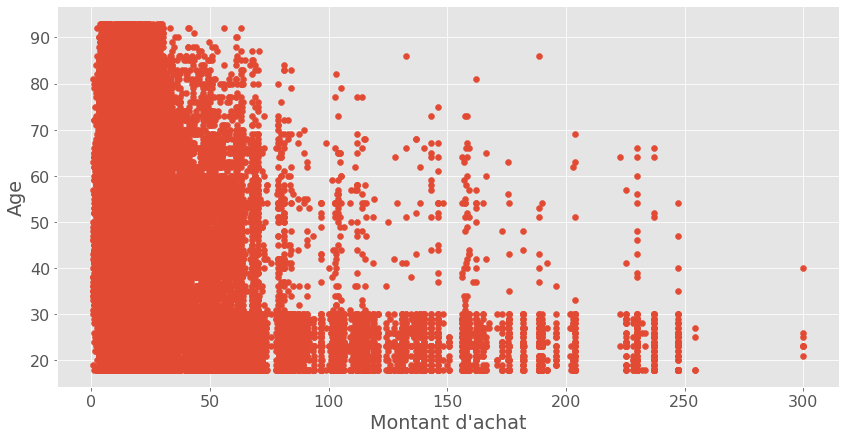

In [162]:
#table de points
plt.scatter( Ventes_produits_finale["price"], Ventes_produits_finale["Age"])
plt.xlabel("Montant d'achat")
plt.ylabel("Age")
plt.show()

In [163]:
 Ventes_produits_finale

,id_prod,date,session_id,client_id,sex,birth,now_year,Age,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,2022,45,4.99,0.0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,2022,22,65.75,2.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,2022,43,10.71,1.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,2022,42,8.99,0.0
5,0_1085,2021-09-15 05:47:48.215162,s_90139,c_2526,f,1982,2022,40,3.99,0.0
...,...,...,...,...,...,...,...,...,...,...
337010,1_498,2022-02-03 01:39:15.793010,s_159138,c_1857,f,1990,2022,32,23.37,1.0
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,2022,53,31.99,1.0
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,2022,31,22.99,0.0
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,2022,54,11.03,0.0


In [164]:
# observation du mois de mars
plus_65_mars=adult_50pl[(adult_50pl.date > '2021-03-01') & (adult_50pl.date < '2021-03-31')]
plus_65_mars

,id_prod,date,session_id,client_id,sex,birth,now_year,Age,price,categ
293,1_468,2021-03-24 00:16:14.572159,s_10588,c_1458,m,1939,2022,83,17.75,1.0
454,0_1505,2021-03-20 07:36:19.779883,s_8886,c_4333,m,1956,2022,66,14.99,0.0
591,1_388,2021-03-25 23:42:03.079288,s_11485,c_8161,m,1955,2022,67,16.70,1.0
817,0_1230,2021-03-23 01:43:58.820136,s_10153,c_181,f,1942,2022,80,12.83,0.0
864,0_1471,2021-03-18 03:23:15.689492,s_7875,c_6834,f,1955,2022,67,12.99,0.0
...,...,...,...,...,...,...,...,...,...,...
336128,1_388,2021-03-28 14:10:07.606991,s_12638,c_2542,f,1937,2022,85,16.70,1.0
336131,0_1713,2021-03-28 15:26:04.681891,s_12672,c_2750,f,1956,2022,66,13.99,0.0
336185,0_1429,2021-03-21 16:52:13.021896,s_9533,c_7347,f,1944,2022,78,7.99,0.0
336325,1_388,2021-03-30 05:57:56.345335,s_13389,c_3202,m,1954,2022,68,16.70,1.0


In [165]:
# ajout d'une colonne "sous-categorie age "
cate_age=[]
for age in Ventes_produits_finale['Age']:
    if age<25 :
        cate_age.append("18-24 ans")
    elif age>=65 :
        cate_age.append("65 ans et +")
    else:
        cate_age.append("25-64 ans")
Ventes_produits_finale['categ_age']= cate_age
Ventes_produits_finale.sort_values(by = 'Age', ascending = False)

C:\Users\DOGRAT~1\AppData\Local\Temp/ipykernel_17456/809168110.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ventes_produits_finale['categ_age']= cate_age


,id_prod,date,session_id,client_id,sex,birth,now_year,Age,price,categ,categ_age
8015,1_320,2021-03-30 20:47:44.684387,s_13681,c_577,m,1929,2022,93,27.46,1.0,65 ans et +
67407,1_397,2021-07-04 12:20:29.214953,s_57746,c_577,m,1929,2022,93,18.99,1.0,65 ans et +
165989,0_1228,2022-02-12 13:28:59.249358,s_164023,c_577,m,1929,2022,93,3.55,0.0,65 ans et +
259039,0_1410,2021-09-10 02:20:40.037784,s_87562,c_577,m,1929,2022,93,14.85,0.0,65 ans et +
123376,0_1449,2022-02-06 22:10:09.281708,s_161070,c_577,m,1929,2022,93,4.99,0.0,65 ans et +
...,...,...,...,...,...,...,...,...,...,...,...
324695,0_1579,2021-12-28 09:07:51.440336,s_141238,c_6120,f,2004,2022,18,3.99,0.0,18-24 ans
18488,1_436,2021-06-09 15:29:36.665493,s_46316,c_4234,m,2004,2022,18,11.76,1.0,18-24 ans
296590,1_406,2022-02-17 00:33:24.468433,s_166343,c_6,f,2004,2022,18,24.81,1.0,18-24 ans
47377,2_96,2021-09-10 03:49:51.670684,s_87589,c_6464,m,2004,2022,18,47.91,2.0,18-24 ans


In [166]:
#ratio categ_age
categ_age=Ventes_produits_finale['categ_age'].value_counts()
ratio_age =categ_age/categ_age.sum()
round(ratio_age,2)

25-64 ans      0.84
65 ans et +    0.09
18-24 ans      0.07
Name: categ_age, dtype: float64

In [167]:
#table de fidelité 
fidelite_client=Ventes_produits_finale.groupby("client_id").count().reset_index()
fidelite_client=fidelite_client[["client_id","session_id"]]
fidelite_client

,client_id,session_id
0,c_1,19
1,c_10,28
2,c_100,6
3,c_1000,53
4,c_1001,51
...,...,...
8593,c_995,8
8594,c_996,41
8595,c_997,22
8596,c_998,28


In [168]:
# table fid 
fid=fidelite_client.groupby("session_id").count().reset_index()
fid

,session_id,client_id
0,1,46
1,2,99
2,3,149
3,4,148
4,5,192
...,...,...
174,184,1
175,2452,1
176,3130,1
177,4167,1


Text(0.5, 1.0, 'Evolution de Fidelité')

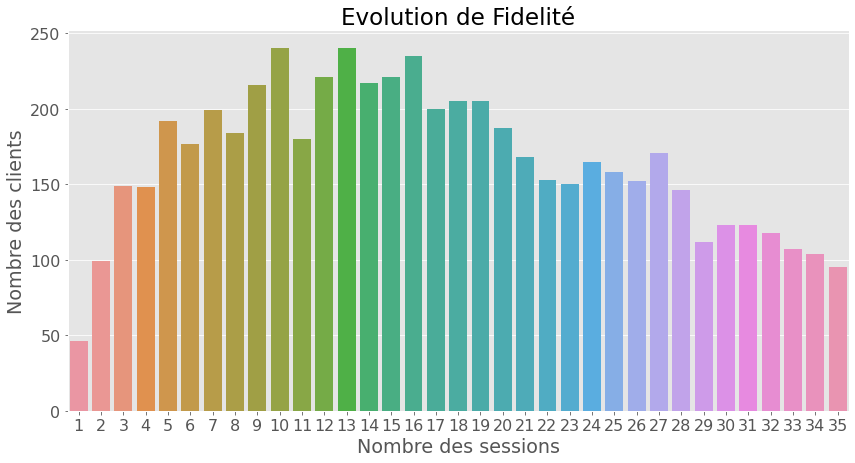

In [169]:
#on voit sur l'évolution de fidelité de clients entre 5 et 20 fois achats par clients
sns.barplot(x="session_id", y="client_id", data=fid[:35])
plt.xlabel("Nombre des sessions")
plt.ylabel("Nombre des clients")
plt.title("Evolution de Fidelité")

# Mission 3  Analyse bivariée (corrélation de données )

# corrélation entre sex et catégorie des produits

In [170]:
#le tableau de contingence
X = "sex"
Y = "categ"
cont = Ventes_produits_finale[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0.0,1.0,2.0,Total
sex,,,,
f,94273,54497,7693,156463
m,95548,53230,8680,157458
Total,189821,107727,16373,313921


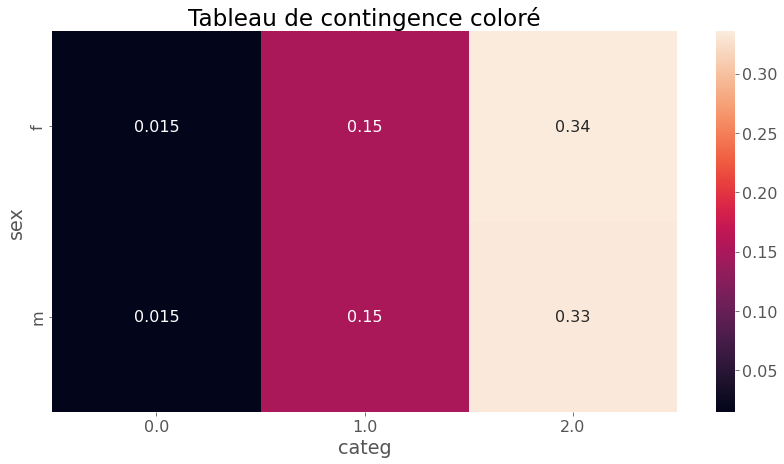

In [171]:
#Cette mesure est calculable pour chacune des cases du tableau de contingence. 
#Il peut être intéressant de colorer ce dernier en fonction de cette mesure : 
#foncé quand la mesure est grande, clair quand elle est proche de 0. Ainsi,
#on détecte facilement les cases qui sont source de non-indépendance 
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(Ventes_produits_finale)
indep = tx.dot(ty) / n
c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot= True)
plt.title("Tableau de contingence coloré")
plt.show()

In [172]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)

In [173]:
# Nombe de degrés de liberté
st_dof

6

In [174]:
# P_value : (degré de significativité)l'unique valeur nécessaire pour prendre notre décision
st_p

3.908880412194039e-15

In [175]:
# Statistique khi2, calculée
round(st_chi2,2)

79.81

In [176]:
# On peut considérer cette valeur comme une contribution à la non indépendance. 
#Elle est optionnellement exprimable en pourcentage si on la multiplie par 100.
#Plus cette contribution sera proche de 100%, plus la case en question sera source de non-indépendance.
#La somme de toutes les contributions vaut 100%.
#alors dans notre cas ce loin de 100% plus la case est indépendant plus elle est la couleur est fonce 

# corrélation entre age et montant 

In [177]:
achats= Ventes_produits_finale[Ventes_produits_finale.price > 0]
achats=achats.groupby("Age").sum().reset_index()
achats=achats[achats.price<200000]

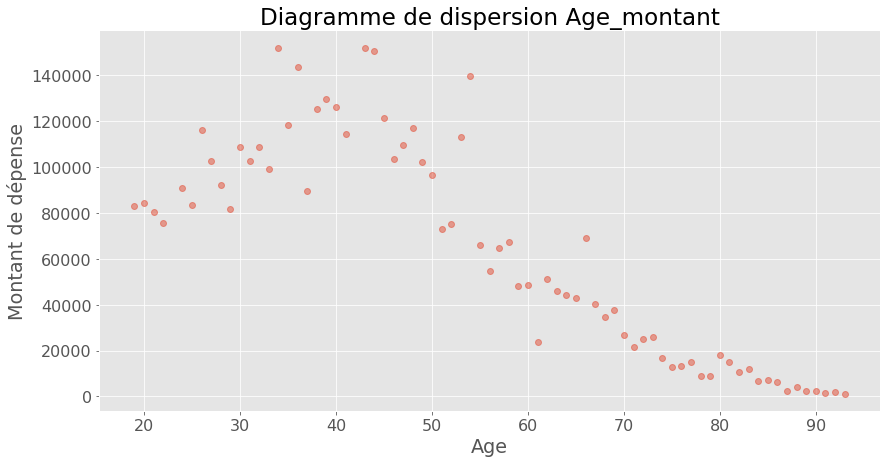

In [178]:
#diagramme de dispersion
plt.plot(achats["Age"],achats["price"],'o',alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Montant de dépense")
plt.title("Diagramme de dispersion Age_montant")
plt.show()

In [179]:
# calculer le coefficient de Pearson et la covariance
print(st.pearsonr(achats["Age"],achats["price"])[0]) # le coefficient de Pearson est proche -1 ,alors  plus la relation linéaire négative entre les variables est forte
print(np.cov(achats["Age"],achats["price"],ddof=0)[1,0])#la covariance c'est déterminer la direction d'une relation linéaire entre deux variables 

-0.8404037005630765
-838166.7261906548


# le coefficient de Pearson est proche -1  indique une corrélation négative parfaite: lorsque la variable Age augmente,la variable prix diminue dans la même proportion c'est à dire qu'il ya une corrélation entre le prix et l'age 

# correlation entre age et frequence d'achat

In [180]:
#Agrégation des données selon l'âge client
#Le nombre d'achat mensuel est obtenu à partir du comptage des sessions clients par mois
#Hypothèse 1 id_session = 1 transation
customers_freq = Ventes_produits_finale.groupby('Age').count().reset_index()
customers_freq = customers_freq[['Age', 'session_id']]

#Création d'une variable fréquence 'f'
customers_freq['f'] = customers_freq['session_id'] / sum(customers_freq['session_id'])
customers_freq.sort_values(by='Age', ascending=False).head(10)
customers_freq=customers_freq[customers_freq.f<0.05]

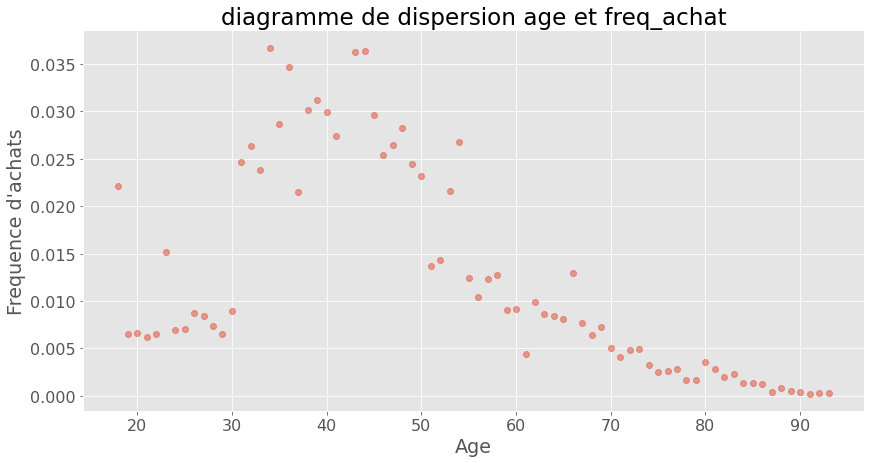

In [181]:
plt.plot(customers_freq["Age"],customers_freq["f"],'o',alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Frequence d'achats")
plt.title("diagramme de dispersion age et freq_achat")
plt.show()

In [182]:
print(st.pearsonr(customers_freq["f"],customers_freq["Age"])[0]) 
print(np.cov(customers_freq["f"],customers_freq["Age"],ddof=0)[1,0])

-0.5805976385806503
-0.1396481654089192


# le coefficient de Pearson est proche -1  indique une corrélation négative parfaite: lorsque la variable Age augmente,la variable freq diminue dans la même proportion c'est à dire qu'il ya une corrélation entre le prix et la freq  

# correlation age et tail de panier 

In [183]:
#Première agrégation selon l'age client et les sessions en comptage de modalités
customers_shop = Ventes_produits_finale.groupby(['Age', 'session_id']).count().reset_index()
#Seconde agrégation selon l'age client en moyenne de produits achetés 
customers_shop = customers_shop.groupby('Age').mean().reset_index()
customers_shop = customers_shop[['Age', 'id_prod']]
customers_shop

,Age,id_prod
0,18,1.772762
1,19,1.734124
2,20,1.748744
3,21,1.745717
4,22,1.843049
...,...,...
71,89,1.411215
72,90,1.516129
73,91,1.772727
74,92,1.608696


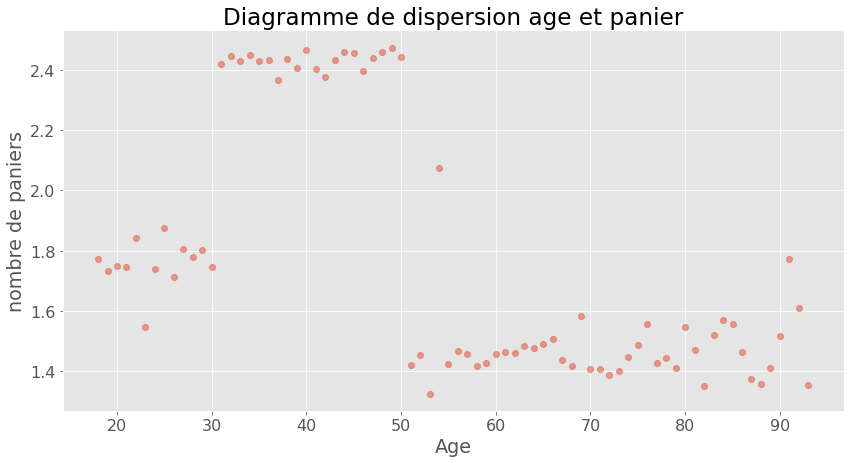

In [184]:
plt.plot(customers_shop["Age"],customers_shop["id_prod"],'o',alpha=0.5)
plt.xlabel("Age")
plt.ylabel("nombre de paniers")
plt.title("Diagramme de dispersion age et panier")
plt.show()

In [185]:
print(st.pearsonr(customers_shop["id_prod"],customers_shop["Age"])[0])
print(np.cov(customers_shop["id_prod"],customers_shop["Age"],ddof=0)[1,0])

-0.5769251428813409
-5.2690983548222565


# le coefficient de Pearson est proche -1  indique une corrélation négative parfaite ,plus l'age augmente ,plus la moyenne de panier diminue 

# corrélation entre catégorie d'age et catégorie de produit  

In [186]:
#création de tableau de contingece 
K = "categ_age"
L = "categ"

cont_cat = Ventes_produits_finale[[K,L]].pivot_table(index=K,columns=L,aggfunc=len,margins=True,margins_name="Total")
cont_cat

categ,0.0,1.0,2.0,Total
categ_age,,,,
18-24 ans,4315,8456,9261,22032
25-64 ans,173067,82555,6872,262494
65 ans et +,12439,16716,240,29395
Total,189821,107727,16373,313921


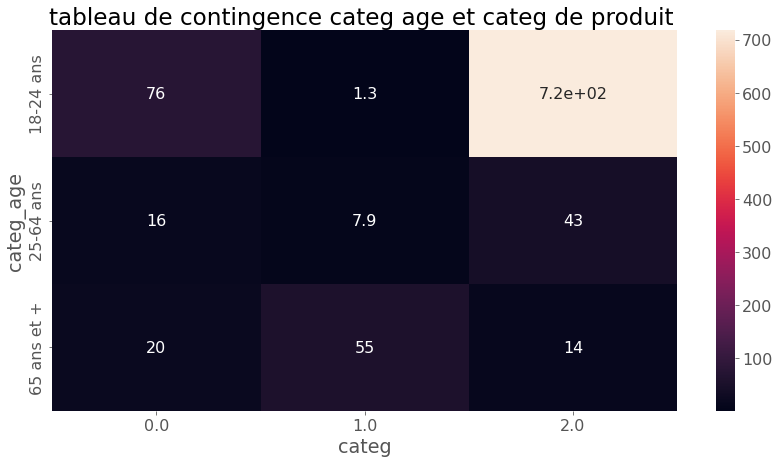

In [187]:
#  tableau de contingence
tx = cont_cat.loc[:,["Total"]]
ty = cont_cat.loc[["Total"],:]
n_c = len(Ventes_produits_finale)
indep_c = tx.dot(ty) / n_c
c = cont_cat.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep_c)**2/indep_c
xi_nc = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot= True)
plt.title("tableau de contingence categ age et categ de produit ")
plt.show()

In [188]:
st_chi2_cat, st_p_cat, st_dof_cat, st_exp_cat = st.chi2_contingency(cont_cat)

In [189]:
# Statistique khi2, calculée
st_chi2_cat

75828.71893862024

In [190]:
# P_value : (degré de significativité)l'unique valeur nécessaire pour prendre notre décision
st_p_cat

0.0

In [191]:
# Nombe de degrés de liberté
st_dof_cat

9

# pas de corrélation entre catégorie d'age et catégorie de produits ,mais il y a la corrélation entre catégorie d'age 18-24 et categ produit 2

# calcule d'eta carre 

In [192]:
X = "categ" # qualitative
Y = "Age" # quantitative

# On ne garde que les dépenses
sous_echantillon = Ventes_produits_finale[Ventes_produits_finale["Age"] > 0].copy()
# On remet les dépenses en positif
sous_echantillon["Age"] = sous_echantillon["Age"]
# On n'étudie pas les loyers car trop gros:
sous_echantillon = sous_echantillon[sous_echantillon["categ"] != "LOYER"] 

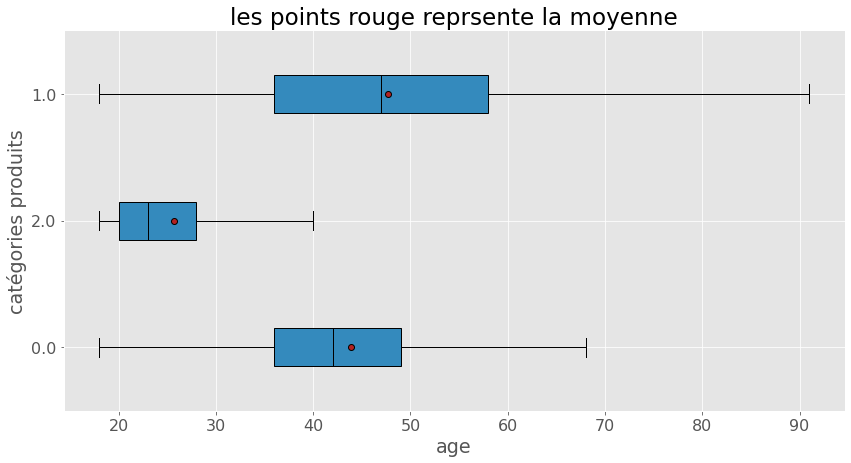

In [193]:
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.ylabel("catégories produits")
plt.xlabel("age")
plt.title("les points rouge reprsente la moyenne")
plt.show()

In [194]:
# calcule d'eta_carré
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.11866755107248668